In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# data frame
df = pd.read_csv('../server/src/csv/ca.csv', header=1)
df = df.rename(columns={"Unnamed: 0":"date", "last_price":"close"})

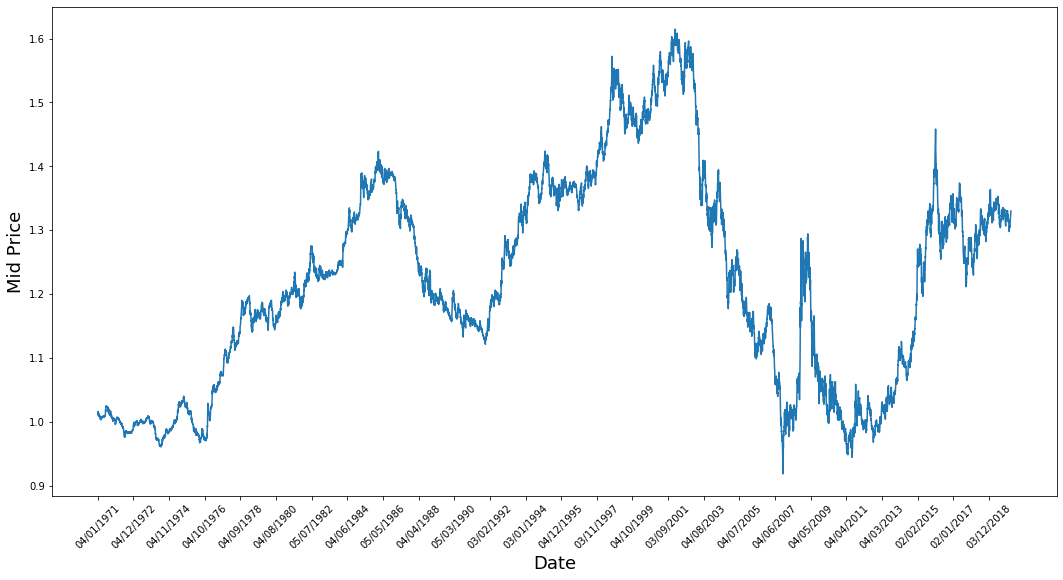

In [3]:
plt.figure(figsize = (18,9))
# plot mid price
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [4]:
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0
print(mid_prices)

[1.0109 1.0102 1.0106 ... 1.3283 1.329  1.33  ]


(11000, 1)


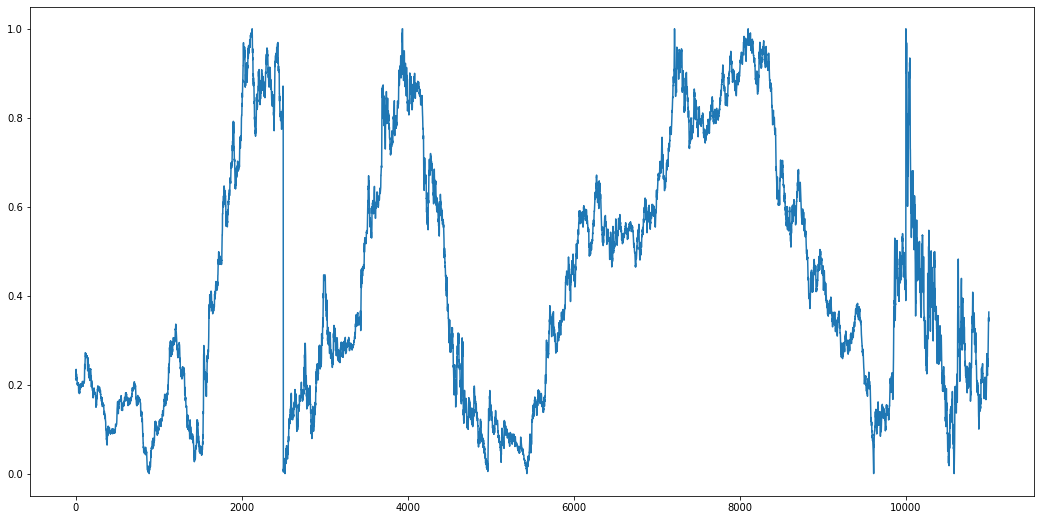

In [5]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
    
# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

plt.figure(figsize = (18,9))
plt.plot(train_data)
print(train_data.shape)

In [6]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

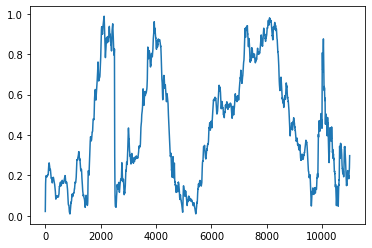

In [7]:
plt.plot(train_data)
train_data = train_data.reshape(11000, 1)

In [8]:
generator = TimeseriesGenerator(train_data, train_data, length=30, batch_size=1)
print(len(generator))

10970


In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=20, return_sequences=False, activation='relu', input_shape=(30, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

model.fit_generator(generator, steps_per_epoch=1, epochs=10970, verbose=2)

Epoch 1/10970
1/1 - 1s - loss: 0.3918
Epoch 2/10970
1/1 - 0s - loss: 1.1562
Epoch 3/10970
1/1 - 0s - loss: 0.0542
Epoch 4/10970
1/1 - 0s - loss: 0.4462
Epoch 5/10970
1/1 - 0s - loss: 0.9831
Epoch 6/10970
1/1 - 0s - loss: 0.8745
Epoch 7/10970
1/1 - 0s - loss: 0.5419
Epoch 8/10970
1/1 - 0s - loss: 0.1559
Epoch 9/10970
1/1 - 0s - loss: 0.4775
Epoch 10/10970
1/1 - 0s - loss: 0.4407
Epoch 11/10970
1/1 - 0s - loss: 1.0479
Epoch 12/10970
1/1 - 0s - loss: 1.1449
Epoch 13/10970
1/1 - 0s - loss: 0.1939
Epoch 14/10970
1/1 - 0s - loss: 0.4270
Epoch 15/10970
1/1 - 0s - loss: 1.0538
Epoch 16/10970
1/1 - 0s - loss: 1.1427
Epoch 17/10970
1/1 - 0s - loss: 0.0335
Epoch 18/10970
1/1 - 0s - loss: 0.5954
Epoch 19/10970
1/1 - 0s - loss: 0.0795
Epoch 20/10970
1/1 - 0s - loss: 1.0341
Epoch 21/10970
1/1 - 0s - loss: 0.1823
Epoch 22/10970
1/1 - 0s - loss: 0.0304
Epoch 23/10970
1/1 - 0s - loss: 1.0686
Epoch 24/10970
1/1 - 0s - loss: 0.2886
Epoch 25/10970
1/1 - 0s - loss: 1.1109
Epoch 26/10970
1/1 - 0s - loss: 0.

Epoch 209/10970
1/1 - 0s - loss: 0.1360
Epoch 210/10970
1/1 - 0s - loss: 0.0141
Epoch 211/10970
1/1 - 0s - loss: 0.1260
Epoch 212/10970
1/1 - 0s - loss: 0.1344
Epoch 213/10970
1/1 - 0s - loss: 0.0439
Epoch 214/10970
1/1 - 0s - loss: 0.0361
Epoch 215/10970
1/1 - 0s - loss: 0.0669
Epoch 216/10970
1/1 - 0s - loss: 0.0271
Epoch 217/10970
1/1 - 0s - loss: 0.0884
Epoch 218/10970
1/1 - 0s - loss: 0.0430
Epoch 219/10970
1/1 - 0s - loss: 0.0499
Epoch 220/10970
1/1 - 0s - loss: 0.0676
Epoch 221/10970
1/1 - 0s - loss: 0.1128
Epoch 222/10970
1/1 - 0s - loss: 0.0594
Epoch 223/10970
1/1 - 0s - loss: 0.0344
Epoch 224/10970
1/1 - 0s - loss: 0.1742
Epoch 225/10970
1/1 - 0s - loss: 0.1686
Epoch 226/10970
1/1 - 0s - loss: 0.0054
Epoch 227/10970
1/1 - 0s - loss: 0.0594
Epoch 228/10970
1/1 - 0s - loss: 0.2649
Epoch 229/10970
1/1 - 0s - loss: 0.0183
Epoch 230/10970
1/1 - 0s - loss: 0.0462
Epoch 231/10970
1/1 - 0s - loss: 0.0542
Epoch 232/10970
1/1 - 0s - loss: 0.0432
Epoch 233/10970
1/1 - 0s - loss: 0.0734


Epoch 414/10970
1/1 - 0s - loss: 0.0237
Epoch 415/10970
1/1 - 0s - loss: 0.0016
Epoch 416/10970
1/1 - 0s - loss: 0.0506
Epoch 417/10970
1/1 - 0s - loss: 0.0831
Epoch 418/10970
1/1 - 0s - loss: 0.0486
Epoch 419/10970
1/1 - 0s - loss: 0.0287
Epoch 420/10970
1/1 - 0s - loss: 0.0186
Epoch 421/10970
1/1 - 0s - loss: 0.0163
Epoch 422/10970
1/1 - 0s - loss: 0.0310
Epoch 423/10970
1/1 - 0s - loss: 0.0121
Epoch 424/10970
1/1 - 0s - loss: 0.0316
Epoch 425/10970
1/1 - 0s - loss: 0.0197
Epoch 426/10970
1/1 - 0s - loss: 0.0021
Epoch 427/10970
1/1 - 0s - loss: 0.0443
Epoch 428/10970
1/1 - 0s - loss: 0.0199
Epoch 429/10970
1/1 - 0s - loss: 0.0712
Epoch 430/10970
1/1 - 0s - loss: 0.0118
Epoch 431/10970
1/1 - 0s - loss: 0.0316
Epoch 432/10970
1/1 - 0s - loss: 0.0520
Epoch 433/10970
1/1 - 0s - loss: 0.0343
Epoch 434/10970
1/1 - 0s - loss: 0.0220
Epoch 435/10970
1/1 - 0s - loss: 0.0121
Epoch 436/10970
1/1 - 0s - loss: 0.0428
Epoch 437/10970
1/1 - 0s - loss: 0.0777
Epoch 438/10970
1/1 - 0s - loss: 0.0217


1/1 - 0s - loss: 0.0141
Epoch 619/10970
1/1 - 0s - loss: 0.0239
Epoch 620/10970
1/1 - 0s - loss: 0.0327
Epoch 621/10970
1/1 - 0s - loss: 0.0179
Epoch 622/10970
1/1 - 0s - loss: 0.0073
Epoch 623/10970
1/1 - 0s - loss: 0.0359
Epoch 624/10970
1/1 - 0s - loss: 0.0101
Epoch 625/10970
1/1 - 0s - loss: 0.0223
Epoch 626/10970
1/1 - 0s - loss: 0.0320
Epoch 627/10970
1/1 - 0s - loss: 0.0071
Epoch 628/10970
1/1 - 0s - loss: 0.0071
Epoch 629/10970
1/1 - 0s - loss: 0.0061
Epoch 630/10970
1/1 - 0s - loss: 0.0406
Epoch 631/10970
1/1 - 0s - loss: 0.0311
Epoch 632/10970
1/1 - 0s - loss: 0.0360
Epoch 633/10970
1/1 - 0s - loss: 0.0281
Epoch 634/10970
1/1 - 0s - loss: 6.4106e-04
Epoch 635/10970
1/1 - 0s - loss: 0.0016
Epoch 636/10970
1/1 - 0s - loss: 0.0039
Epoch 637/10970
1/1 - 0s - loss: 0.0055
Epoch 638/10970
1/1 - 0s - loss: 5.8562e-06
Epoch 639/10970
1/1 - 0s - loss: 0.0034
Epoch 640/10970
1/1 - 0s - loss: 0.0039
Epoch 641/10970
1/1 - 0s - loss: 0.1498
Epoch 642/10970
1/1 - 0s - loss: 0.0321
Epoch 64

Epoch 823/10970
1/1 - 0s - loss: 0.0012
Epoch 824/10970
1/1 - 0s - loss: 0.0203
Epoch 825/10970
1/1 - 0s - loss: 0.0081
Epoch 826/10970
1/1 - 0s - loss: 0.0123
Epoch 827/10970
1/1 - 0s - loss: 0.0066
Epoch 828/10970
1/1 - 0s - loss: 0.0424
Epoch 829/10970
1/1 - 0s - loss: 0.0014
Epoch 830/10970
1/1 - 0s - loss: 0.0143
Epoch 831/10970
1/1 - 0s - loss: 0.0285
Epoch 832/10970
1/1 - 0s - loss: 0.0205
Epoch 833/10970
1/1 - 0s - loss: 0.0118
Epoch 834/10970
1/1 - 0s - loss: 0.0137
Epoch 835/10970
1/1 - 0s - loss: 0.0052
Epoch 836/10970
1/1 - 0s - loss: 0.0048
Epoch 837/10970
1/1 - 0s - loss: 0.0287
Epoch 838/10970
1/1 - 0s - loss: 0.0446
Epoch 839/10970
1/1 - 0s - loss: 0.0133
Epoch 840/10970
1/1 - 0s - loss: 0.0302
Epoch 841/10970
1/1 - 0s - loss: 0.0757
Epoch 842/10970
1/1 - 0s - loss: 0.0033
Epoch 843/10970
1/1 - 0s - loss: 0.0108
Epoch 844/10970
1/1 - 0s - loss: 0.0072
Epoch 845/10970
1/1 - 0s - loss: 0.0265
Epoch 846/10970
1/1 - 0s - loss: 0.0124
Epoch 847/10970
1/1 - 0s - loss: 0.0261


Epoch 1027/10970
1/1 - 0s - loss: 0.0971
Epoch 1028/10970
1/1 - 0s - loss: 7.2049e-04
Epoch 1029/10970
1/1 - 0s - loss: 0.0099
Epoch 1030/10970
1/1 - 0s - loss: 0.0217
Epoch 1031/10970
1/1 - 0s - loss: 0.0707
Epoch 1032/10970
1/1 - 0s - loss: 0.0088
Epoch 1033/10970
1/1 - 0s - loss: 0.0425
Epoch 1034/10970
1/1 - 0s - loss: 0.0215
Epoch 1035/10970
1/1 - 0s - loss: 0.0086
Epoch 1036/10970
1/1 - 0s - loss: 0.0678
Epoch 1037/10970
1/1 - 0s - loss: 0.0387
Epoch 1038/10970
1/1 - 0s - loss: 0.0308
Epoch 1039/10970
1/1 - 0s - loss: 0.0570
Epoch 1040/10970
1/1 - 0s - loss: 4.3875e-04
Epoch 1041/10970
1/1 - 0s - loss: 0.0149
Epoch 1042/10970
1/1 - 0s - loss: 0.0204
Epoch 1043/10970
1/1 - 0s - loss: 0.0222
Epoch 1044/10970
1/1 - 0s - loss: 0.0176
Epoch 1045/10970
1/1 - 0s - loss: 0.0456
Epoch 1046/10970
1/1 - 0s - loss: 0.0174
Epoch 1047/10970
1/1 - 0s - loss: 0.0131
Epoch 1048/10970
1/1 - 0s - loss: 0.0185
Epoch 1049/10970
1/1 - 0s - loss: 0.0199
Epoch 1050/10970
1/1 - 0s - loss: 0.0081
Epoch 10

1/1 - 0s - loss: 0.0388
Epoch 1227/10970
1/1 - 0s - loss: 0.0288
Epoch 1228/10970
1/1 - 0s - loss: 0.0781
Epoch 1229/10970
1/1 - 0s - loss: 0.0270
Epoch 1230/10970
1/1 - 0s - loss: 0.0247
Epoch 1231/10970
1/1 - 0s - loss: 0.0186
Epoch 1232/10970
1/1 - 0s - loss: 0.0321
Epoch 1233/10970
1/1 - 0s - loss: 0.0102
Epoch 1234/10970
1/1 - 0s - loss: 0.0084
Epoch 1235/10970
1/1 - 0s - loss: 0.0125
Epoch 1236/10970
1/1 - 0s - loss: 0.0877
Epoch 1237/10970
1/1 - 0s - loss: 0.0357
Epoch 1238/10970
1/1 - 0s - loss: 0.0174
Epoch 1239/10970
1/1 - 0s - loss: 0.0042
Epoch 1240/10970
1/1 - 0s - loss: 0.0137
Epoch 1241/10970
1/1 - 0s - loss: 0.0694
Epoch 1242/10970
1/1 - 0s - loss: 0.0072
Epoch 1243/10970
1/1 - 0s - loss: 0.0207
Epoch 1244/10970
1/1 - 0s - loss: 0.0055
Epoch 1245/10970
1/1 - 0s - loss: 0.0188
Epoch 1246/10970
1/1 - 0s - loss: 0.0101
Epoch 1247/10970
1/1 - 0s - loss: 0.0239
Epoch 1248/10970
1/1 - 0s - loss: 0.0180
Epoch 1249/10970
1/1 - 0s - loss: 0.0167
Epoch 1250/10970
1/1 - 0s - loss:

Epoch 1426/10970
1/1 - 0s - loss: 0.0328
Epoch 1427/10970
1/1 - 0s - loss: 0.0143
Epoch 1428/10970
1/1 - 0s - loss: 0.0366
Epoch 1429/10970
1/1 - 0s - loss: 0.0029
Epoch 1430/10970
1/1 - 0s - loss: 0.0386
Epoch 1431/10970
1/1 - 0s - loss: 0.0036
Epoch 1432/10970
1/1 - 0s - loss: 0.0100
Epoch 1433/10970
1/1 - 0s - loss: 0.0072
Epoch 1434/10970
1/1 - 0s - loss: 0.1012
Epoch 1435/10970
1/1 - 0s - loss: 0.0018
Epoch 1436/10970
1/1 - 0s - loss: 9.6895e-04
Epoch 1437/10970
1/1 - 0s - loss: 0.0189
Epoch 1438/10970
1/1 - 0s - loss: 0.0046
Epoch 1439/10970
1/1 - 0s - loss: 0.0043
Epoch 1440/10970
1/1 - 0s - loss: 0.0851
Epoch 1441/10970
1/1 - 0s - loss: 0.0350
Epoch 1442/10970
1/1 - 0s - loss: 0.0552
Epoch 1443/10970
1/1 - 0s - loss: 0.0122
Epoch 1444/10970
1/1 - 0s - loss: 0.0368
Epoch 1445/10970
1/1 - 0s - loss: 0.0230
Epoch 1446/10970
1/1 - 0s - loss: 0.0125
Epoch 1447/10970
1/1 - 0s - loss: 0.0045
Epoch 1448/10970
1/1 - 0s - loss: 0.0454
Epoch 1449/10970
1/1 - 0s - loss: 0.0535
Epoch 1450/1

1/1 - 0s - loss: 0.0026
Epoch 1626/10970
1/1 - 0s - loss: 0.0773
Epoch 1627/10970
1/1 - 0s - loss: 0.0045
Epoch 1628/10970
1/1 - 0s - loss: 0.0140
Epoch 1629/10970
1/1 - 0s - loss: 0.0628
Epoch 1630/10970
1/1 - 0s - loss: 0.0138
Epoch 1631/10970
1/1 - 0s - loss: 0.0323
Epoch 1632/10970
1/1 - 0s - loss: 0.0137
Epoch 1633/10970
1/1 - 0s - loss: 0.3193
Epoch 1634/10970
1/1 - 0s - loss: 0.0150
Epoch 1635/10970
1/1 - 0s - loss: 0.0348
Epoch 1636/10970
1/1 - 0s - loss: 0.0349
Epoch 1637/10970
1/1 - 0s - loss: 0.0046
Epoch 1638/10970
1/1 - 0s - loss: 0.0108
Epoch 1639/10970
1/1 - 0s - loss: 0.0443
Epoch 1640/10970
1/1 - 0s - loss: 0.0446
Epoch 1641/10970
1/1 - 0s - loss: 0.0178
Epoch 1642/10970
1/1 - 0s - loss: 0.0061
Epoch 1643/10970
1/1 - 0s - loss: 0.0311
Epoch 1644/10970
1/1 - 0s - loss: 0.0398
Epoch 1645/10970
1/1 - 0s - loss: 0.0231
Epoch 1646/10970
1/1 - 0s - loss: 0.0487
Epoch 1647/10970
1/1 - 0s - loss: 0.0066
Epoch 1648/10970
1/1 - 0s - loss: 0.0146
Epoch 1649/10970
1/1 - 0s - loss:

Epoch 1825/10970
1/1 - 0s - loss: 0.0155
Epoch 1826/10970
1/1 - 0s - loss: 0.0487
Epoch 1827/10970
1/1 - 0s - loss: 0.0049
Epoch 1828/10970
1/1 - 0s - loss: 0.0222
Epoch 1829/10970
1/1 - 0s - loss: 0.0071
Epoch 1830/10970
1/1 - 0s - loss: 0.0079
Epoch 1831/10970
1/1 - 0s - loss: 0.0189
Epoch 1832/10970
1/1 - 0s - loss: 0.3243
Epoch 1833/10970
1/1 - 0s - loss: 0.0818
Epoch 1834/10970
1/1 - 0s - loss: 0.0039
Epoch 1835/10970
1/1 - 0s - loss: 0.0230
Epoch 1836/10970
1/1 - 0s - loss: 0.0198
Epoch 1837/10970
1/1 - 0s - loss: 0.0158
Epoch 1838/10970
1/1 - 0s - loss: 0.0647
Epoch 1839/10970
1/1 - 0s - loss: 0.0728
Epoch 1840/10970
1/1 - 0s - loss: 0.0069
Epoch 1841/10970
1/1 - 0s - loss: 0.0064
Epoch 1842/10970
1/1 - 0s - loss: 0.0091
Epoch 1843/10970
1/1 - 0s - loss: 0.0458
Epoch 1844/10970
1/1 - 0s - loss: 0.0015
Epoch 1845/10970
1/1 - 0s - loss: 0.0099
Epoch 1846/10970
1/1 - 0s - loss: 0.0090
Epoch 1847/10970
1/1 - 0s - loss: 0.0417
Epoch 1848/10970
1/1 - 0s - loss: 0.0045
Epoch 1849/10970

1/1 - 0s - loss: 0.0130
Epoch 2025/10970
1/1 - 0s - loss: 0.0061
Epoch 2026/10970
1/1 - 0s - loss: 0.0385
Epoch 2027/10970
1/1 - 0s - loss: 0.0074
Epoch 2028/10970
1/1 - 0s - loss: 0.0014
Epoch 2029/10970
1/1 - 0s - loss: 0.0064
Epoch 2030/10970
1/1 - 0s - loss: 0.0093
Epoch 2031/10970
1/1 - 0s - loss: 0.0104
Epoch 2032/10970
1/1 - 0s - loss: 0.0181
Epoch 2033/10970
1/1 - 0s - loss: 0.0046
Epoch 2034/10970
1/1 - 0s - loss: 0.0167
Epoch 2035/10970
1/1 - 0s - loss: 0.0025
Epoch 2036/10970
1/1 - 0s - loss: 0.0071
Epoch 2037/10970
1/1 - 0s - loss: 0.0347
Epoch 2038/10970
1/1 - 0s - loss: 0.0034
Epoch 2039/10970
1/1 - 0s - loss: 0.0055
Epoch 2040/10970
1/1 - 0s - loss: 0.0157
Epoch 2041/10970
1/1 - 0s - loss: 0.0377
Epoch 2042/10970
1/1 - 0s - loss: 0.0425
Epoch 2043/10970
1/1 - 0s - loss: 0.0242
Epoch 2044/10970
1/1 - 0s - loss: 0.0062
Epoch 2045/10970
1/1 - 0s - loss: 0.0143
Epoch 2046/10970
1/1 - 0s - loss: 2.5567e-04
Epoch 2047/10970
1/1 - 0s - loss: 3.4465e-04
Epoch 2048/10970
1/1 - 0s

1/1 - 0s - loss: 0.0062
Epoch 2224/10970
1/1 - 0s - loss: 0.0092
Epoch 2225/10970
1/1 - 0s - loss: 0.0106
Epoch 2226/10970
1/1 - 0s - loss: 0.0025
Epoch 2227/10970
1/1 - 0s - loss: 0.0144
Epoch 2228/10970
1/1 - 0s - loss: 0.0115
Epoch 2229/10970
1/1 - 0s - loss: 0.0066
Epoch 2230/10970
1/1 - 0s - loss: 0.0178
Epoch 2231/10970
1/1 - 0s - loss: 0.0320
Epoch 2232/10970
1/1 - 0s - loss: 0.0188
Epoch 2233/10970
1/1 - 0s - loss: 0.0235
Epoch 2234/10970
1/1 - 0s - loss: 0.0290
Epoch 2235/10970
1/1 - 0s - loss: 0.0186
Epoch 2236/10970
1/1 - 0s - loss: 0.0030
Epoch 2237/10970
1/1 - 0s - loss: 0.0183
Epoch 2238/10970
1/1 - 0s - loss: 0.0051
Epoch 2239/10970
1/1 - 0s - loss: 0.0244
Epoch 2240/10970
1/1 - 0s - loss: 0.0223
Epoch 2241/10970
1/1 - 0s - loss: 0.0226
Epoch 2242/10970
1/1 - 0s - loss: 2.0591e-04
Epoch 2243/10970
1/1 - 0s - loss: 0.0115
Epoch 2244/10970
1/1 - 0s - loss: 0.0201
Epoch 2245/10970
1/1 - 0s - loss: 0.0238
Epoch 2246/10970
1/1 - 0s - loss: 0.0148
Epoch 2247/10970
1/1 - 0s - l

Epoch 2423/10970
1/1 - 0s - loss: 0.0229
Epoch 2424/10970
1/1 - 0s - loss: 0.0324
Epoch 2425/10970
1/1 - 0s - loss: 0.0272
Epoch 2426/10970
1/1 - 0s - loss: 0.0285
Epoch 2427/10970
1/1 - 0s - loss: 0.0319
Epoch 2428/10970
1/1 - 0s - loss: 0.0093
Epoch 2429/10970
1/1 - 0s - loss: 0.0205
Epoch 2430/10970
1/1 - 0s - loss: 0.0124
Epoch 2431/10970
1/1 - 0s - loss: 0.0038
Epoch 2432/10970
1/1 - 0s - loss: 0.0061
Epoch 2433/10970
1/1 - 0s - loss: 0.0391
Epoch 2434/10970
1/1 - 0s - loss: 0.0027
Epoch 2435/10970
1/1 - 0s - loss: 0.0715
Epoch 2436/10970
1/1 - 0s - loss: 0.0014
Epoch 2437/10970
1/1 - 0s - loss: 0.0103
Epoch 2438/10970
1/1 - 0s - loss: 0.0106
Epoch 2439/10970
1/1 - 0s - loss: 0.0311
Epoch 2440/10970
1/1 - 0s - loss: 0.0343
Epoch 2441/10970
1/1 - 0s - loss: 0.0014
Epoch 2442/10970
1/1 - 0s - loss: 0.0288
Epoch 2443/10970
1/1 - 0s - loss: 0.0164
Epoch 2444/10970
1/1 - 0s - loss: 0.0081
Epoch 2445/10970
1/1 - 0s - loss: 0.0137
Epoch 2446/10970
1/1 - 0s - loss: 0.0055
Epoch 2447/10970

1/1 - 0s - loss: 0.0101
Epoch 2623/10970
1/1 - 0s - loss: 0.0011
Epoch 2624/10970
1/1 - 0s - loss: 0.0043
Epoch 2625/10970
1/1 - 0s - loss: 0.0084
Epoch 2626/10970
1/1 - 0s - loss: 0.0171
Epoch 2627/10970
1/1 - 0s - loss: 0.0231
Epoch 2628/10970
1/1 - 0s - loss: 0.0093
Epoch 2629/10970
1/1 - 0s - loss: 0.0079
Epoch 2630/10970
1/1 - 0s - loss: 0.0069
Epoch 2631/10970
1/1 - 0s - loss: 0.0064
Epoch 2632/10970
1/1 - 0s - loss: 0.0297
Epoch 2633/10970
1/1 - 0s - loss: 0.0282
Epoch 2634/10970
1/1 - 0s - loss: 0.0192
Epoch 2635/10970
1/1 - 0s - loss: 0.0021
Epoch 2636/10970
1/1 - 0s - loss: 0.0324
Epoch 2637/10970
1/1 - 0s - loss: 0.0072
Epoch 2638/10970
1/1 - 0s - loss: 0.0430
Epoch 2639/10970
1/1 - 0s - loss: 0.0064
Epoch 2640/10970
1/1 - 0s - loss: 0.0019
Epoch 2641/10970
1/1 - 0s - loss: 0.0160
Epoch 2642/10970
1/1 - 0s - loss: 0.0489
Epoch 2643/10970
1/1 - 0s - loss: 0.0023
Epoch 2644/10970
1/1 - 0s - loss: 0.0140
Epoch 2645/10970
1/1 - 0s - loss: 0.0039
Epoch 2646/10970
1/1 - 0s - loss:

Epoch 2822/10970
1/1 - 0s - loss: 0.0060
Epoch 2823/10970
1/1 - 0s - loss: 0.0061
Epoch 2824/10970
1/1 - 0s - loss: 0.0268
Epoch 2825/10970
1/1 - 0s - loss: 0.0098
Epoch 2826/10970
1/1 - 0s - loss: 0.0227
Epoch 2827/10970
1/1 - 0s - loss: 0.0128
Epoch 2828/10970
1/1 - 0s - loss: 0.0077
Epoch 2829/10970
1/1 - 0s - loss: 0.0091
Epoch 2830/10970
1/1 - 0s - loss: 0.0158
Epoch 2831/10970
1/1 - 0s - loss: 0.0162
Epoch 2832/10970
1/1 - 0s - loss: 0.0099
Epoch 2833/10970
1/1 - 0s - loss: 0.0262
Epoch 2834/10970
1/1 - 0s - loss: 0.0461
Epoch 2835/10970
1/1 - 0s - loss: 0.0369
Epoch 2836/10970
1/1 - 0s - loss: 0.0159
Epoch 2837/10970
1/1 - 0s - loss: 0.0428
Epoch 2838/10970
1/1 - 0s - loss: 0.0013
Epoch 2839/10970
1/1 - 0s - loss: 0.0111
Epoch 2840/10970
1/1 - 0s - loss: 0.0159
Epoch 2841/10970
1/1 - 0s - loss: 0.2099
Epoch 2842/10970
1/1 - 0s - loss: 0.0330
Epoch 2843/10970
1/1 - 0s - loss: 0.0034
Epoch 2844/10970
1/1 - 0s - loss: 0.0246
Epoch 2845/10970
1/1 - 0s - loss: 0.0131
Epoch 2846/10970

1/1 - 0s - loss: 0.0102
Epoch 3022/10970
1/1 - 0s - loss: 0.0190
Epoch 3023/10970
1/1 - 0s - loss: 0.0119
Epoch 3024/10970
1/1 - 0s - loss: 0.0220
Epoch 3025/10970
1/1 - 0s - loss: 0.0084
Epoch 3026/10970
1/1 - 0s - loss: 0.0040
Epoch 3027/10970
1/1 - 0s - loss: 0.0084
Epoch 3028/10970
1/1 - 0s - loss: 0.0038
Epoch 3029/10970
1/1 - 0s - loss: 0.0153
Epoch 3030/10970
1/1 - 0s - loss: 0.0582
Epoch 3031/10970
1/1 - 0s - loss: 0.0238
Epoch 3032/10970
1/1 - 0s - loss: 0.0717
Epoch 3033/10970
1/1 - 0s - loss: 0.2098
Epoch 3034/10970
1/1 - 0s - loss: 0.0069
Epoch 3035/10970
1/1 - 0s - loss: 2.4548e-04
Epoch 3036/10970
1/1 - 0s - loss: 0.0101
Epoch 3037/10970
1/1 - 0s - loss: 0.0011
Epoch 3038/10970
1/1 - 0s - loss: 0.0138
Epoch 3039/10970
1/1 - 0s - loss: 0.0162
Epoch 3040/10970
1/1 - 0s - loss: 0.0012
Epoch 3041/10970
1/1 - 0s - loss: 0.0029
Epoch 3042/10970
1/1 - 0s - loss: 0.0151
Epoch 3043/10970
1/1 - 0s - loss: 0.0171
Epoch 3044/10970
1/1 - 0s - loss: 0.0188
Epoch 3045/10970
1/1 - 0s - l

1/1 - 0s - loss: 0.0175
Epoch 3221/10970
1/1 - 0s - loss: 0.0026
Epoch 3222/10970
1/1 - 0s - loss: 0.0116
Epoch 3223/10970
1/1 - 0s - loss: 0.0257
Epoch 3224/10970
1/1 - 0s - loss: 0.0067
Epoch 3225/10970
1/1 - 0s - loss: 0.0149
Epoch 3226/10970
1/1 - 0s - loss: 0.0070
Epoch 3227/10970
1/1 - 0s - loss: 0.0244
Epoch 3228/10970
1/1 - 0s - loss: 0.0247
Epoch 3229/10970
1/1 - 0s - loss: 0.0148
Epoch 3230/10970
1/1 - 0s - loss: 0.0103
Epoch 3231/10970
1/1 - 0s - loss: 0.0025
Epoch 3232/10970
1/1 - 0s - loss: 4.5300e-06
Epoch 3233/10970
1/1 - 0s - loss: 0.0234
Epoch 3234/10970
1/1 - 0s - loss: 0.0139
Epoch 3235/10970
1/1 - 0s - loss: 3.7813e-04
Epoch 3236/10970
1/1 - 0s - loss: 0.0022
Epoch 3237/10970
1/1 - 0s - loss: 0.0140
Epoch 3238/10970
1/1 - 0s - loss: 0.0070
Epoch 3239/10970
1/1 - 0s - loss: 0.0054
Epoch 3240/10970
1/1 - 0s - loss: 4.3342e-04
Epoch 3241/10970
1/1 - 0s - loss: 0.0210
Epoch 3242/10970
1/1 - 0s - loss: 0.0109
Epoch 3243/10970
1/1 - 0s - loss: 0.0043
Epoch 3244/10970
1/1 

1/1 - 0s - loss: 0.0313
Epoch 3420/10970
1/1 - 0s - loss: 0.0126
Epoch 3421/10970
1/1 - 0s - loss: 0.0238
Epoch 3422/10970
1/1 - 0s - loss: 0.0012
Epoch 3423/10970
1/1 - 0s - loss: 6.0648e-04
Epoch 3424/10970
1/1 - 0s - loss: 0.0260
Epoch 3425/10970
1/1 - 0s - loss: 0.0466
Epoch 3426/10970
1/1 - 0s - loss: 0.0042
Epoch 3427/10970
1/1 - 0s - loss: 0.0446
Epoch 3428/10970
1/1 - 0s - loss: 0.0032
Epoch 3429/10970
1/1 - 0s - loss: 0.0036
Epoch 3430/10970
1/1 - 0s - loss: 0.0126
Epoch 3431/10970
1/1 - 0s - loss: 0.0043
Epoch 3432/10970
1/1 - 0s - loss: 9.6387e-04
Epoch 3433/10970
1/1 - 0s - loss: 0.0142
Epoch 3434/10970
1/1 - 0s - loss: 0.0132
Epoch 3435/10970
1/1 - 0s - loss: 0.0107
Epoch 3436/10970
1/1 - 0s - loss: 0.0208
Epoch 3437/10970
1/1 - 0s - loss: 0.0071
Epoch 3438/10970
1/1 - 0s - loss: 3.3879e-04
Epoch 3439/10970
1/1 - 0s - loss: 0.0133
Epoch 3440/10970
1/1 - 0s - loss: 0.0333
Epoch 3441/10970
1/1 - 0s - loss: 0.0104
Epoch 3442/10970
1/1 - 0s - loss: 0.0208
Epoch 3443/10970
1/1 

1/1 - 0s - loss: 0.0155
Epoch 3619/10970
1/1 - 0s - loss: 0.0656
Epoch 3620/10970
1/1 - 0s - loss: 0.0125
Epoch 3621/10970
1/1 - 0s - loss: 0.0073
Epoch 3622/10970
1/1 - 0s - loss: 0.0513
Epoch 3623/10970
1/1 - 0s - loss: 0.0298
Epoch 3624/10970
1/1 - 0s - loss: 0.0682
Epoch 3625/10970
1/1 - 0s - loss: 0.0289
Epoch 3626/10970
1/1 - 0s - loss: 0.0304
Epoch 3627/10970
1/1 - 0s - loss: 0.0300
Epoch 3628/10970
1/1 - 0s - loss: 0.0153
Epoch 3629/10970
1/1 - 0s - loss: 0.0302
Epoch 3630/10970
1/1 - 0s - loss: 0.0297
Epoch 3631/10970
1/1 - 0s - loss: 0.0016
Epoch 3632/10970
1/1 - 0s - loss: 0.0058
Epoch 3633/10970
1/1 - 0s - loss: 0.0015
Epoch 3634/10970
1/1 - 0s - loss: 2.3650e-04
Epoch 3635/10970
1/1 - 0s - loss: 0.0204
Epoch 3636/10970
1/1 - 0s - loss: 0.0271
Epoch 3637/10970
1/1 - 0s - loss: 0.0109
Epoch 3638/10970
1/1 - 0s - loss: 0.0218
Epoch 3639/10970
1/1 - 0s - loss: 0.0109
Epoch 3640/10970
1/1 - 0s - loss: 0.0019
Epoch 3641/10970
1/1 - 0s - loss: 0.0021
Epoch 3642/10970
1/1 - 0s - l

1/1 - 0s - loss: 0.0202
Epoch 3817/10970
1/1 - 0s - loss: 0.0512
Epoch 3818/10970
1/1 - 0s - loss: 0.0074
Epoch 3819/10970
1/1 - 0s - loss: 0.0031
Epoch 3820/10970
1/1 - 0s - loss: 0.0040
Epoch 3821/10970
1/1 - 0s - loss: 6.8456e-04
Epoch 3822/10970
1/1 - 0s - loss: 0.0275
Epoch 3823/10970
1/1 - 0s - loss: 0.0088
Epoch 3824/10970
1/1 - 0s - loss: 0.0050
Epoch 3825/10970
1/1 - 0s - loss: 0.0074
Epoch 3826/10970
1/1 - 0s - loss: 0.0028
Epoch 3827/10970
1/1 - 0s - loss: 0.0045
Epoch 3828/10970
1/1 - 0s - loss: 0.0110
Epoch 3829/10970
1/1 - 0s - loss: 0.0096
Epoch 3830/10970
1/1 - 0s - loss: 0.0049
Epoch 3831/10970
1/1 - 0s - loss: 0.0135
Epoch 3832/10970
1/1 - 0s - loss: 0.0010
Epoch 3833/10970
1/1 - 0s - loss: 0.0067
Epoch 3834/10970
1/1 - 0s - loss: 6.4591e-04
Epoch 3835/10970
1/1 - 0s - loss: 0.0031
Epoch 3836/10970
1/1 - 0s - loss: 0.0278
Epoch 3837/10970
1/1 - 0s - loss: 0.0060
Epoch 3838/10970
1/1 - 0s - loss: 0.0134
Epoch 3839/10970
1/1 - 0s - loss: 0.0070
Epoch 3840/10970
1/1 - 0s

1/1 - 0s - loss: 0.0088
Epoch 4016/10970
1/1 - 0s - loss: 0.0099
Epoch 4017/10970
1/1 - 0s - loss: 0.0102
Epoch 4018/10970
1/1 - 0s - loss: 0.0120
Epoch 4019/10970
1/1 - 0s - loss: 0.0230
Epoch 4020/10970
1/1 - 0s - loss: 0.0018
Epoch 4021/10970
1/1 - 0s - loss: 7.0906e-04
Epoch 4022/10970
1/1 - 0s - loss: 0.0474
Epoch 4023/10970
1/1 - 0s - loss: 0.0216
Epoch 4024/10970
1/1 - 0s - loss: 0.0193
Epoch 4025/10970
1/1 - 0s - loss: 0.0152
Epoch 4026/10970
1/1 - 0s - loss: 0.0119
Epoch 4027/10970
1/1 - 0s - loss: 0.0119
Epoch 4028/10970
1/1 - 0s - loss: 0.0229
Epoch 4029/10970
1/1 - 0s - loss: 0.0172
Epoch 4030/10970
1/1 - 0s - loss: 0.0160
Epoch 4031/10970
1/1 - 0s - loss: 0.0043
Epoch 4032/10970
1/1 - 0s - loss: 0.0121
Epoch 4033/10970
1/1 - 0s - loss: 0.0345
Epoch 4034/10970
1/1 - 0s - loss: 0.0087
Epoch 4035/10970
1/1 - 0s - loss: 0.0118
Epoch 4036/10970
1/1 - 0s - loss: 3.6956e-04
Epoch 4037/10970
1/1 - 0s - loss: 0.0193
Epoch 4038/10970
1/1 - 0s - loss: 0.0347
Epoch 4039/10970
1/1 - 0s

1/1 - 0s - loss: 0.0374
Epoch 4215/10970
1/1 - 0s - loss: 1.3924e-04
Epoch 4216/10970
1/1 - 0s - loss: 4.3514e-04
Epoch 4217/10970
1/1 - 0s - loss: 0.0165
Epoch 4218/10970
1/1 - 0s - loss: 2.5725e-04
Epoch 4219/10970
1/1 - 0s - loss: 0.0052
Epoch 4220/10970
1/1 - 0s - loss: 7.3272e-04
Epoch 4221/10970
1/1 - 0s - loss: 0.0237
Epoch 4222/10970
1/1 - 0s - loss: 0.0126
Epoch 4223/10970
1/1 - 0s - loss: 0.0014
Epoch 4224/10970
1/1 - 0s - loss: 3.4893e-04
Epoch 4225/10970
1/1 - 0s - loss: 0.0113
Epoch 4226/10970
1/1 - 0s - loss: 0.0331
Epoch 4227/10970
1/1 - 0s - loss: 0.0066
Epoch 4228/10970
1/1 - 0s - loss: 0.0191
Epoch 4229/10970
1/1 - 0s - loss: 0.0212
Epoch 4230/10970
1/1 - 0s - loss: 0.0117
Epoch 4231/10970
1/1 - 0s - loss: 0.0085
Epoch 4232/10970
1/1 - 0s - loss: 0.0161
Epoch 4233/10970
1/1 - 0s - loss: 0.0061
Epoch 4234/10970
1/1 - 0s - loss: 0.0357
Epoch 4235/10970
1/1 - 0s - loss: 0.0249
Epoch 4236/10970
1/1 - 0s - loss: 0.0183
Epoch 4237/10970
1/1 - 0s - loss: 0.0099
Epoch 4238/10

1/1 - 0s - loss: 0.0186
Epoch 4414/10970
1/1 - 0s - loss: 0.0406
Epoch 4415/10970
1/1 - 0s - loss: 0.0035
Epoch 4416/10970
1/1 - 0s - loss: 0.0099
Epoch 4417/10970
1/1 - 0s - loss: 0.0044
Epoch 4418/10970
1/1 - 0s - loss: 0.0226
Epoch 4419/10970
1/1 - 0s - loss: 0.0292
Epoch 4420/10970
1/1 - 0s - loss: 0.0203
Epoch 4421/10970
1/1 - 0s - loss: 0.0108
Epoch 4422/10970
1/1 - 0s - loss: 0.0051
Epoch 4423/10970
1/1 - 0s - loss: 0.0027
Epoch 4424/10970
1/1 - 0s - loss: 0.0026
Epoch 4425/10970
1/1 - 0s - loss: 0.0045
Epoch 4426/10970
1/1 - 0s - loss: 0.0257
Epoch 4427/10970
1/1 - 0s - loss: 0.0091
Epoch 4428/10970
1/1 - 0s - loss: 0.0124
Epoch 4429/10970
1/1 - 0s - loss: 5.4115e-04
Epoch 4430/10970
1/1 - 0s - loss: 6.5362e-04
Epoch 4431/10970
1/1 - 0s - loss: 0.0044
Epoch 4432/10970
1/1 - 0s - loss: 0.0208
Epoch 4433/10970
1/1 - 0s - loss: 0.0157
Epoch 4434/10970
1/1 - 0s - loss: 0.0125
Epoch 4435/10970
1/1 - 0s - loss: 0.0016
Epoch 4436/10970
1/1 - 0s - loss: 0.0048
Epoch 4437/10970
1/1 - 0s

1/1 - 0s - loss: 0.0038
Epoch 4613/10970
1/1 - 0s - loss: 0.0074
Epoch 4614/10970
1/1 - 0s - loss: 0.0088
Epoch 4615/10970
1/1 - 0s - loss: 0.0068
Epoch 4616/10970
1/1 - 0s - loss: 0.0068
Epoch 4617/10970
1/1 - 0s - loss: 0.0249
Epoch 4618/10970
1/1 - 0s - loss: 0.0111
Epoch 4619/10970
1/1 - 0s - loss: 0.0046
Epoch 4620/10970
1/1 - 0s - loss: 0.0360
Epoch 4621/10970
1/1 - 0s - loss: 0.0076
Epoch 4622/10970
1/1 - 0s - loss: 0.0062
Epoch 4623/10970
1/1 - 0s - loss: 6.3360e-04
Epoch 4624/10970
1/1 - 0s - loss: 0.0370
Epoch 4625/10970
1/1 - 0s - loss: 0.0151
Epoch 4626/10970
1/1 - 0s - loss: 0.0122
Epoch 4627/10970
1/1 - 0s - loss: 6.4254e-05
Epoch 4628/10970
1/1 - 0s - loss: 0.0100
Epoch 4629/10970
1/1 - 0s - loss: 0.0034
Epoch 4630/10970
1/1 - 0s - loss: 0.0123
Epoch 4631/10970
1/1 - 0s - loss: 1.2422e-04
Epoch 4632/10970
1/1 - 0s - loss: 0.0018
Epoch 4633/10970
1/1 - 0s - loss: 0.0045
Epoch 4634/10970
1/1 - 0s - loss: 0.0074
Epoch 4635/10970
1/1 - 0s - loss: 0.0064
Epoch 4636/10970
1/1 

1/1 - 0s - loss: 0.0059
Epoch 4812/10970
1/1 - 0s - loss: 7.2372e-04
Epoch 4813/10970
1/1 - 0s - loss: 0.0040
Epoch 4814/10970
1/1 - 0s - loss: 0.0042
Epoch 4815/10970
1/1 - 0s - loss: 0.0233
Epoch 4816/10970
1/1 - 0s - loss: 0.0044
Epoch 4817/10970
1/1 - 0s - loss: 0.0178
Epoch 4818/10970
1/1 - 0s - loss: 0.0012
Epoch 4819/10970
1/1 - 0s - loss: 0.0343
Epoch 4820/10970
1/1 - 0s - loss: 0.0111
Epoch 4821/10970
1/1 - 0s - loss: 0.0110
Epoch 4822/10970
1/1 - 0s - loss: 0.0112
Epoch 4823/10970
1/1 - 0s - loss: 0.0060
Epoch 4824/10970
1/1 - 0s - loss: 0.0244
Epoch 4825/10970
1/1 - 0s - loss: 0.0318
Epoch 4826/10970
1/1 - 0s - loss: 0.0245
Epoch 4827/10970
1/1 - 0s - loss: 0.0235
Epoch 4828/10970
1/1 - 0s - loss: 0.0302
Epoch 4829/10970
1/1 - 0s - loss: 0.0017
Epoch 4830/10970
1/1 - 0s - loss: 0.0321
Epoch 4831/10970
1/1 - 0s - loss: 0.0025
Epoch 4832/10970
1/1 - 0s - loss: 0.0332
Epoch 4833/10970
1/1 - 0s - loss: 0.0329
Epoch 4834/10970
1/1 - 0s - loss: 0.0080
Epoch 4835/10970
1/1 - 0s - l

Epoch 5011/10970
1/1 - 0s - loss: 0.0134
Epoch 5012/10970
1/1 - 0s - loss: 0.0035
Epoch 5013/10970
1/1 - 0s - loss: 0.0041
Epoch 5014/10970
1/1 - 0s - loss: 0.0076
Epoch 5015/10970
1/1 - 0s - loss: 0.0050
Epoch 5016/10970
1/1 - 0s - loss: 0.0017
Epoch 5017/10970
1/1 - 0s - loss: 0.0086
Epoch 5018/10970
1/1 - 0s - loss: 0.0162
Epoch 5019/10970
1/1 - 0s - loss: 0.0049
Epoch 5020/10970
1/1 - 0s - loss: 0.0051
Epoch 5021/10970
1/1 - 0s - loss: 0.0120
Epoch 5022/10970
1/1 - 0s - loss: 0.0100
Epoch 5023/10970
1/1 - 0s - loss: 0.0107
Epoch 5024/10970
1/1 - 0s - loss: 0.0194
Epoch 5025/10970
1/1 - 0s - loss: 0.0086
Epoch 5026/10970
1/1 - 0s - loss: 0.0091
Epoch 5027/10970
1/1 - 0s - loss: 0.0182
Epoch 5028/10970
1/1 - 0s - loss: 0.0068
Epoch 5029/10970
1/1 - 0s - loss: 6.4582e-04
Epoch 5030/10970
1/1 - 0s - loss: 0.0041
Epoch 5031/10970
1/1 - 0s - loss: 0.0103
Epoch 5032/10970
1/1 - 0s - loss: 0.0053
Epoch 5033/10970
1/1 - 0s - loss: 0.0012
Epoch 5034/10970
1/1 - 0s - loss: 0.0227
Epoch 5035/1

Epoch 5210/10970
1/1 - 0s - loss: 0.0213
Epoch 5211/10970
1/1 - 0s - loss: 0.0069
Epoch 5212/10970
1/1 - 0s - loss: 0.0016
Epoch 5213/10970
1/1 - 0s - loss: 0.0288
Epoch 5214/10970
1/1 - 0s - loss: 0.0191
Epoch 5215/10970
1/1 - 0s - loss: 0.0228
Epoch 5216/10970
1/1 - 0s - loss: 0.0012
Epoch 5217/10970
1/1 - 0s - loss: 0.0093
Epoch 5218/10970
1/1 - 0s - loss: 0.0034
Epoch 5219/10970
1/1 - 0s - loss: 0.0283
Epoch 5220/10970
1/1 - 0s - loss: 0.0171
Epoch 5221/10970
1/1 - 0s - loss: 0.0112
Epoch 5222/10970
1/1 - 0s - loss: 0.0056
Epoch 5223/10970
1/1 - 0s - loss: 0.0046
Epoch 5224/10970
1/1 - 0s - loss: 0.0147
Epoch 5225/10970
1/1 - 0s - loss: 0.0258
Epoch 5226/10970
1/1 - 0s - loss: 0.0369
Epoch 5227/10970
1/1 - 0s - loss: 0.0163
Epoch 5228/10970
1/1 - 0s - loss: 0.0018
Epoch 5229/10970
1/1 - 0s - loss: 0.0123
Epoch 5230/10970
1/1 - 0s - loss: 0.0138
Epoch 5231/10970
1/1 - 0s - loss: 0.0041
Epoch 5232/10970
1/1 - 0s - loss: 0.0021
Epoch 5233/10970
1/1 - 0s - loss: 0.0011
Epoch 5234/10970

Epoch 5409/10970
1/1 - 0s - loss: 8.1757e-04
Epoch 5410/10970
1/1 - 0s - loss: 0.0210
Epoch 5411/10970
1/1 - 0s - loss: 0.0145
Epoch 5412/10970
1/1 - 0s - loss: 0.0079
Epoch 5413/10970
1/1 - 0s - loss: 0.0043
Epoch 5414/10970
1/1 - 0s - loss: 0.0158
Epoch 5415/10970
1/1 - 0s - loss: 0.0046
Epoch 5416/10970
1/1 - 0s - loss: 0.0216
Epoch 5417/10970
1/1 - 0s - loss: 0.0027
Epoch 5418/10970
1/1 - 0s - loss: 0.0029
Epoch 5419/10970
1/1 - 0s - loss: 0.0090
Epoch 5420/10970
1/1 - 0s - loss: 0.0120
Epoch 5421/10970
1/1 - 0s - loss: 0.0139
Epoch 5422/10970
1/1 - 0s - loss: 0.0044
Epoch 5423/10970
1/1 - 0s - loss: 0.0298
Epoch 5424/10970
1/1 - 0s - loss: 0.0324
Epoch 5425/10970
1/1 - 0s - loss: 0.0152
Epoch 5426/10970
1/1 - 0s - loss: 0.0144
Epoch 5427/10970
1/1 - 0s - loss: 0.0101
Epoch 5428/10970
1/1 - 0s - loss: 0.0055
Epoch 5429/10970
1/1 - 0s - loss: 0.0073
Epoch 5430/10970
1/1 - 0s - loss: 0.0173
Epoch 5431/10970
1/1 - 0s - loss: 0.0193
Epoch 5432/10970
1/1 - 0s - loss: 0.0079
Epoch 5433/1

Epoch 5608/10970
1/1 - 0s - loss: 0.0174
Epoch 5609/10970
1/1 - 0s - loss: 0.0273
Epoch 5610/10970
1/1 - 0s - loss: 0.0159
Epoch 5611/10970
1/1 - 0s - loss: 0.0378
Epoch 5612/10970
1/1 - 0s - loss: 0.0282
Epoch 5613/10970
1/1 - 0s - loss: 0.0171
Epoch 5614/10970
1/1 - 0s - loss: 0.0165
Epoch 5615/10970
1/1 - 0s - loss: 0.0085
Epoch 5616/10970
1/1 - 0s - loss: 0.0091
Epoch 5617/10970
1/1 - 0s - loss: 0.0049
Epoch 5618/10970
1/1 - 0s - loss: 0.0207
Epoch 5619/10970
1/1 - 0s - loss: 0.0068
Epoch 5620/10970
1/1 - 0s - loss: 8.6989e-04
Epoch 5621/10970
1/1 - 0s - loss: 0.0377
Epoch 5622/10970
1/1 - 0s - loss: 0.0034
Epoch 5623/10970
1/1 - 0s - loss: 0.0455
Epoch 5624/10970
1/1 - 0s - loss: 1.8109e-04
Epoch 5625/10970
1/1 - 0s - loss: 0.0116
Epoch 5626/10970
1/1 - 0s - loss: 0.0061
Epoch 5627/10970
1/1 - 0s - loss: 0.0061
Epoch 5628/10970
1/1 - 0s - loss: 0.0078
Epoch 5629/10970
1/1 - 0s - loss: 0.0171
Epoch 5630/10970
1/1 - 0s - loss: 0.0251
Epoch 5631/10970
1/1 - 0s - loss: 0.0096
Epoch 56

1/1 - 0s - loss: 0.0227
Epoch 5808/10970
1/1 - 0s - loss: 0.0272
Epoch 5809/10970
1/1 - 0s - loss: 0.0208
Epoch 5810/10970
1/1 - 0s - loss: 0.0082
Epoch 5811/10970
1/1 - 0s - loss: 0.0199
Epoch 5812/10970
1/1 - 0s - loss: 0.0231
Epoch 5813/10970
1/1 - 0s - loss: 0.0041
Epoch 5814/10970
1/1 - 0s - loss: 0.0145
Epoch 5815/10970
1/1 - 0s - loss: 0.0431
Epoch 5816/10970
1/1 - 0s - loss: 0.0034
Epoch 5817/10970
1/1 - 0s - loss: 0.0178
Epoch 5818/10970
1/1 - 0s - loss: 0.0016
Epoch 5819/10970
1/1 - 0s - loss: 0.0069
Epoch 5820/10970
1/1 - 0s - loss: 0.0286
Epoch 5821/10970
1/1 - 0s - loss: 2.0134e-04
Epoch 5822/10970
1/1 - 0s - loss: 0.0130
Epoch 5823/10970
1/1 - 0s - loss: 0.0182
Epoch 5824/10970
1/1 - 0s - loss: 0.0097
Epoch 5825/10970
1/1 - 0s - loss: 0.0044
Epoch 5826/10970
1/1 - 0s - loss: 6.7183e-04
Epoch 5827/10970
1/1 - 0s - loss: 0.0201
Epoch 5828/10970
1/1 - 0s - loss: 0.0152
Epoch 5829/10970
1/1 - 0s - loss: 0.0224
Epoch 5830/10970
1/1 - 0s - loss: 0.0067
Epoch 5831/10970
1/1 - 0s

1/1 - 0s - loss: 0.0177
Epoch 6007/10970
1/1 - 0s - loss: 0.0113
Epoch 6008/10970
1/1 - 0s - loss: 0.0184
Epoch 6009/10970
1/1 - 0s - loss: 0.0035
Epoch 6010/10970
1/1 - 0s - loss: 0.0134
Epoch 6011/10970
1/1 - 0s - loss: 0.0046
Epoch 6012/10970
1/1 - 0s - loss: 0.0057
Epoch 6013/10970
1/1 - 0s - loss: 0.0091
Epoch 6014/10970
1/1 - 0s - loss: 0.0529
Epoch 6015/10970
1/1 - 0s - loss: 0.0565
Epoch 6016/10970
1/1 - 0s - loss: 0.0306
Epoch 6017/10970
1/1 - 0s - loss: 0.0188
Epoch 6018/10970
1/1 - 0s - loss: 0.0202
Epoch 6019/10970
1/1 - 0s - loss: 0.0407
Epoch 6020/10970
1/1 - 0s - loss: 0.0036
Epoch 6021/10970
1/1 - 0s - loss: 0.0156
Epoch 6022/10970
1/1 - 0s - loss: 0.0086
Epoch 6023/10970
1/1 - 0s - loss: 0.0077
Epoch 6024/10970
1/1 - 0s - loss: 0.0135
Epoch 6025/10970
1/1 - 0s - loss: 0.0350
Epoch 6026/10970
1/1 - 0s - loss: 0.0102
Epoch 6027/10970
1/1 - 0s - loss: 0.0196
Epoch 6028/10970
1/1 - 0s - loss: 0.0066
Epoch 6029/10970
1/1 - 0s - loss: 0.0025
Epoch 6030/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0084
Epoch 6206/10970
1/1 - 0s - loss: 0.0104
Epoch 6207/10970
1/1 - 0s - loss: 0.0278
Epoch 6208/10970
1/1 - 0s - loss: 0.0042
Epoch 6209/10970
1/1 - 0s - loss: 0.0062
Epoch 6210/10970
1/1 - 0s - loss: 0.0072
Epoch 6211/10970
1/1 - 0s - loss: 0.0102
Epoch 6212/10970
1/1 - 0s - loss: 0.0312
Epoch 6213/10970
1/1 - 0s - loss: 0.0023
Epoch 6214/10970
1/1 - 0s - loss: 0.0065
Epoch 6215/10970
1/1 - 0s - loss: 0.0029
Epoch 6216/10970
1/1 - 0s - loss: 0.0237
Epoch 6217/10970
1/1 - 0s - loss: 6.6084e-04
Epoch 6218/10970
1/1 - 0s - loss: 0.0073
Epoch 6219/10970
1/1 - 0s - loss: 0.0605
Epoch 6220/10970
1/1 - 0s - loss: 0.0096
Epoch 6221/10970
1/1 - 0s - loss: 0.0074
Epoch 6222/10970
1/1 - 0s - loss: 0.0352
Epoch 6223/10970
1/1 - 0s - loss: 0.0128
Epoch 6224/10970
1/1 - 0s - loss: 0.0181
Epoch 6225/10970
1/1 - 0s - loss: 0.0402
Epoch 6226/10970
1/1 - 0s - loss: 0.0171
Epoch 6227/10970
1/1 - 0s - loss: 0.0022
Epoch 6228/10970
1/1 - 0s - loss: 8.3134e-04
Epoch 6229/10970
1/1 - 0s

Epoch 6405/10970
1/1 - 0s - loss: 0.0052
Epoch 6406/10970
1/1 - 0s - loss: 0.0117
Epoch 6407/10970
1/1 - 0s - loss: 0.0172
Epoch 6408/10970
1/1 - 0s - loss: 0.0112
Epoch 6409/10970
1/1 - 0s - loss: 0.0024
Epoch 6410/10970
1/1 - 0s - loss: 0.0194
Epoch 6411/10970
1/1 - 0s - loss: 0.0148
Epoch 6412/10970
1/1 - 0s - loss: 0.0107
Epoch 6413/10970
1/1 - 0s - loss: 0.0254
Epoch 6414/10970
1/1 - 0s - loss: 0.0293
Epoch 6415/10970
1/1 - 0s - loss: 0.0064
Epoch 6416/10970
1/1 - 0s - loss: 0.0199
Epoch 6417/10970
1/1 - 0s - loss: 0.0105
Epoch 6418/10970
1/1 - 0s - loss: 0.0432
Epoch 6419/10970
1/1 - 0s - loss: 0.0243
Epoch 6420/10970
1/1 - 0s - loss: 0.0137
Epoch 6421/10970
1/1 - 0s - loss: 0.0041
Epoch 6422/10970
1/1 - 0s - loss: 0.0183
Epoch 6423/10970
1/1 - 0s - loss: 0.0076
Epoch 6424/10970
1/1 - 0s - loss: 0.0253
Epoch 6425/10970
1/1 - 0s - loss: 0.0245
Epoch 6426/10970
1/1 - 0s - loss: 0.0100
Epoch 6427/10970
1/1 - 0s - loss: 0.0085
Epoch 6428/10970
1/1 - 0s - loss: 0.0068
Epoch 6429/10970

Epoch 6604/10970
1/1 - 0s - loss: 0.0219
Epoch 6605/10970
1/1 - 0s - loss: 0.0014
Epoch 6606/10970
1/1 - 0s - loss: 0.0137
Epoch 6607/10970
1/1 - 0s - loss: 0.0157
Epoch 6608/10970
1/1 - 0s - loss: 0.0055
Epoch 6609/10970
1/1 - 0s - loss: 0.0024
Epoch 6610/10970
1/1 - 0s - loss: 0.0010
Epoch 6611/10970
1/1 - 0s - loss: 0.0152
Epoch 6612/10970
1/1 - 0s - loss: 0.0027
Epoch 6613/10970
1/1 - 0s - loss: 0.0053
Epoch 6614/10970
1/1 - 0s - loss: 0.0029
Epoch 6615/10970
1/1 - 0s - loss: 0.0089
Epoch 6616/10970
1/1 - 0s - loss: 0.0030
Epoch 6617/10970
1/1 - 0s - loss: 7.4342e-04
Epoch 6618/10970
1/1 - 0s - loss: 0.0068
Epoch 6619/10970
1/1 - 0s - loss: 0.0170
Epoch 6620/10970
1/1 - 0s - loss: 0.0052
Epoch 6621/10970
1/1 - 0s - loss: 0.0159
Epoch 6622/10970
1/1 - 0s - loss: 0.0038
Epoch 6623/10970
1/1 - 0s - loss: 4.8511e-04
Epoch 6624/10970
1/1 - 0s - loss: 0.0032
Epoch 6625/10970
1/1 - 0s - loss: 0.0112
Epoch 6626/10970
1/1 - 0s - loss: 0.0064
Epoch 6627/10970
1/1 - 0s - loss: 1.1683e-05
Epoc

1/1 - 0s - loss: 5.3400e-04
Epoch 6803/10970
1/1 - 0s - loss: 0.0012
Epoch 6804/10970
1/1 - 0s - loss: 0.0523
Epoch 6805/10970
1/1 - 0s - loss: 0.0040
Epoch 6806/10970
1/1 - 0s - loss: 0.0076
Epoch 6807/10970
1/1 - 0s - loss: 0.0107
Epoch 6808/10970
1/1 - 0s - loss: 0.0038
Epoch 6809/10970
1/1 - 0s - loss: 0.0084
Epoch 6810/10970
1/1 - 0s - loss: 0.0053
Epoch 6811/10970
1/1 - 0s - loss: 0.0218
Epoch 6812/10970
1/1 - 0s - loss: 0.0111
Epoch 6813/10970
1/1 - 0s - loss: 0.0184
Epoch 6814/10970
1/1 - 0s - loss: 0.0211
Epoch 6815/10970
1/1 - 0s - loss: 0.0104
Epoch 6816/10970
1/1 - 0s - loss: 0.0152
Epoch 6817/10970
1/1 - 0s - loss: 0.0233
Epoch 6818/10970
1/1 - 0s - loss: 0.0102
Epoch 6819/10970
1/1 - 0s - loss: 0.0115
Epoch 6820/10970
1/1 - 0s - loss: 0.0028
Epoch 6821/10970
1/1 - 0s - loss: 0.0030
Epoch 6822/10970
1/1 - 0s - loss: 0.0088
Epoch 6823/10970
1/1 - 0s - loss: 0.0041
Epoch 6824/10970
1/1 - 0s - loss: 0.0148
Epoch 6825/10970
1/1 - 0s - loss: 0.0167
Epoch 6826/10970
1/1 - 0s - l

1/1 - 0s - loss: 0.0075
Epoch 7002/10970
1/1 - 0s - loss: 0.0127
Epoch 7003/10970
1/1 - 0s - loss: 0.0041
Epoch 7004/10970
1/1 - 0s - loss: 0.0191
Epoch 7005/10970
1/1 - 0s - loss: 0.0126
Epoch 7006/10970
1/1 - 0s - loss: 0.0103
Epoch 7007/10970
1/1 - 0s - loss: 0.0048
Epoch 7008/10970
1/1 - 0s - loss: 0.0201
Epoch 7009/10970
1/1 - 0s - loss: 8.3750e-04
Epoch 7010/10970
1/1 - 0s - loss: 0.0131
Epoch 7011/10970
1/1 - 0s - loss: 0.0233
Epoch 7012/10970
1/1 - 0s - loss: 0.0087
Epoch 7013/10970
1/1 - 0s - loss: 0.0053
Epoch 7014/10970
1/1 - 0s - loss: 0.0014
Epoch 7015/10970
1/1 - 0s - loss: 0.0029
Epoch 7016/10970
1/1 - 0s - loss: 4.0734e-04
Epoch 7017/10970
1/1 - 0s - loss: 0.0079
Epoch 7018/10970
1/1 - 0s - loss: 0.0052
Epoch 7019/10970
1/1 - 0s - loss: 0.0118
Epoch 7020/10970
1/1 - 0s - loss: 0.0401
Epoch 7021/10970
1/1 - 0s - loss: 0.0058
Epoch 7022/10970
1/1 - 0s - loss: 0.0061
Epoch 7023/10970
1/1 - 0s - loss: 0.0151
Epoch 7024/10970
1/1 - 0s - loss: 0.0126
Epoch 7025/10970
1/1 - 0s

1/1 - 0s - loss: 0.0035
Epoch 7201/10970
1/1 - 0s - loss: 0.0106
Epoch 7202/10970
1/1 - 0s - loss: 0.0017
Epoch 7203/10970
1/1 - 0s - loss: 0.0025
Epoch 7204/10970
1/1 - 0s - loss: 0.0025
Epoch 7205/10970
1/1 - 0s - loss: 0.0170
Epoch 7206/10970
1/1 - 0s - loss: 0.0191
Epoch 7207/10970
1/1 - 0s - loss: 0.0065
Epoch 7208/10970
1/1 - 0s - loss: 0.0265
Epoch 7209/10970
1/1 - 0s - loss: 0.0019
Epoch 7210/10970
1/1 - 0s - loss: 0.0101
Epoch 7211/10970
1/1 - 0s - loss: 0.0056
Epoch 7212/10970
1/1 - 0s - loss: 0.0038
Epoch 7213/10970
1/1 - 0s - loss: 0.0167
Epoch 7214/10970
1/1 - 0s - loss: 0.0096
Epoch 7215/10970
1/1 - 0s - loss: 0.0122
Epoch 7216/10970
1/1 - 0s - loss: 0.0105
Epoch 7217/10970
1/1 - 0s - loss: 0.0087
Epoch 7218/10970
1/1 - 0s - loss: 0.0196
Epoch 7219/10970
1/1 - 0s - loss: 0.0094
Epoch 7220/10970
1/1 - 0s - loss: 0.0068
Epoch 7221/10970
1/1 - 0s - loss: 0.0109
Epoch 7222/10970
1/1 - 0s - loss: 0.0039
Epoch 7223/10970
1/1 - 0s - loss: 0.0108
Epoch 7224/10970
1/1 - 0s - loss:

Epoch 7400/10970
1/1 - 0s - loss: 0.0208
Epoch 7401/10970
1/1 - 0s - loss: 0.0136
Epoch 7402/10970
1/1 - 0s - loss: 0.0069
Epoch 7403/10970
1/1 - 0s - loss: 0.0025
Epoch 7404/10970
1/1 - 0s - loss: 0.0034
Epoch 7405/10970
1/1 - 0s - loss: 0.0025
Epoch 7406/10970
1/1 - 0s - loss: 0.0236
Epoch 7407/10970
1/1 - 0s - loss: 0.0159
Epoch 7408/10970
1/1 - 0s - loss: 0.0148
Epoch 7409/10970
1/1 - 0s - loss: 0.0047
Epoch 7410/10970
1/1 - 0s - loss: 0.0106
Epoch 7411/10970
1/1 - 0s - loss: 0.0158
Epoch 7412/10970
1/1 - 0s - loss: 0.0029
Epoch 7413/10970
1/1 - 0s - loss: 3.4335e-04
Epoch 7414/10970
1/1 - 0s - loss: 0.0050
Epoch 7415/10970
1/1 - 0s - loss: 0.0151
Epoch 7416/10970
1/1 - 0s - loss: 0.0022
Epoch 7417/10970
1/1 - 0s - loss: 0.0011
Epoch 7418/10970
1/1 - 0s - loss: 5.4410e-04
Epoch 7419/10970
1/1 - 0s - loss: 0.0039
Epoch 7420/10970
1/1 - 0s - loss: 0.0033
Epoch 7421/10970
1/1 - 0s - loss: 0.0084
Epoch 7422/10970
1/1 - 0s - loss: 0.0056
Epoch 7423/10970
1/1 - 0s - loss: 0.0042
Epoch 74

1/1 - 0s - loss: 0.0238
Epoch 7599/10970
1/1 - 0s - loss: 0.0119
Epoch 7600/10970
1/1 - 0s - loss: 0.0050
Epoch 7601/10970
1/1 - 0s - loss: 0.0063
Epoch 7602/10970
1/1 - 0s - loss: 0.0124
Epoch 7603/10970
1/1 - 0s - loss: 0.0247
Epoch 7604/10970
1/1 - 0s - loss: 0.0061
Epoch 7605/10970
1/1 - 0s - loss: 0.0123
Epoch 7606/10970
1/1 - 0s - loss: 0.0163
Epoch 7607/10970
1/1 - 0s - loss: 0.0069
Epoch 7608/10970
1/1 - 0s - loss: 0.0118
Epoch 7609/10970
1/1 - 0s - loss: 0.0146
Epoch 7610/10970
1/1 - 0s - loss: 0.0078
Epoch 7611/10970
1/1 - 0s - loss: 0.0042
Epoch 7612/10970
1/1 - 0s - loss: 0.0081
Epoch 7613/10970
1/1 - 0s - loss: 0.0042
Epoch 7614/10970
1/1 - 0s - loss: 0.0148
Epoch 7615/10970
1/1 - 0s - loss: 0.0249
Epoch 7616/10970
1/1 - 0s - loss: 0.0177
Epoch 7617/10970
1/1 - 0s - loss: 0.0131
Epoch 7618/10970
1/1 - 0s - loss: 0.0054
Epoch 7619/10970
1/1 - 0s - loss: 0.0020
Epoch 7620/10970
1/1 - 0s - loss: 0.0136
Epoch 7621/10970
1/1 - 0s - loss: 0.0042
Epoch 7622/10970
1/1 - 0s - loss:

Epoch 7797/10970
1/1 - 0s - loss: 0.0117
Epoch 7798/10970
1/1 - 0s - loss: 0.0166
Epoch 7799/10970
1/1 - 0s - loss: 0.0151
Epoch 7800/10970
1/1 - 0s - loss: 0.0096
Epoch 7801/10970
1/1 - 0s - loss: 0.0041
Epoch 7802/10970
1/1 - 0s - loss: 0.0026
Epoch 7803/10970
1/1 - 0s - loss: 0.0025
Epoch 7804/10970
1/1 - 0s - loss: 0.0102
Epoch 7805/10970
1/1 - 0s - loss: 0.0188
Epoch 7806/10970
1/1 - 0s - loss: 0.0186
Epoch 7807/10970
1/1 - 0s - loss: 0.0129
Epoch 7808/10970
1/1 - 0s - loss: 0.0398
Epoch 7809/10970
1/1 - 0s - loss: 0.0085
Epoch 7810/10970
1/1 - 0s - loss: 0.0012
Epoch 7811/10970
1/1 - 0s - loss: 0.0043
Epoch 7812/10970
1/1 - 0s - loss: 0.0091
Epoch 7813/10970
1/1 - 0s - loss: 0.0246
Epoch 7814/10970
1/1 - 0s - loss: 7.4984e-04
Epoch 7815/10970
1/1 - 0s - loss: 0.0116
Epoch 7816/10970
1/1 - 0s - loss: 0.0102
Epoch 7817/10970
1/1 - 0s - loss: 0.0101
Epoch 7818/10970
1/1 - 0s - loss: 0.0179
Epoch 7819/10970
1/1 - 0s - loss: 0.0067
Epoch 7820/10970
1/1 - 0s - loss: 0.0100
Epoch 7821/1

Epoch 7996/10970
1/1 - 0s - loss: 0.0057
Epoch 7997/10970
1/1 - 0s - loss: 4.7100e-04
Epoch 7998/10970
1/1 - 0s - loss: 0.0099
Epoch 7999/10970
1/1 - 0s - loss: 0.0267
Epoch 8000/10970
1/1 - 0s - loss: 0.0170
Epoch 8001/10970
1/1 - 0s - loss: 0.0514
Epoch 8002/10970
1/1 - 0s - loss: 0.0150
Epoch 8003/10970
1/1 - 0s - loss: 9.2784e-04
Epoch 8004/10970
1/1 - 0s - loss: 0.0495
Epoch 8005/10970
1/1 - 0s - loss: 8.3910e-04
Epoch 8006/10970
1/1 - 0s - loss: 0.0448
Epoch 8007/10970
1/1 - 0s - loss: 0.0384
Epoch 8008/10970
1/1 - 0s - loss: 0.0061
Epoch 8009/10970
1/1 - 0s - loss: 0.0180
Epoch 8010/10970
1/1 - 0s - loss: 0.0066
Epoch 8011/10970
1/1 - 0s - loss: 0.0106
Epoch 8012/10970
1/1 - 0s - loss: 0.0152
Epoch 8013/10970
1/1 - 0s - loss: 0.0086
Epoch 8014/10970
1/1 - 0s - loss: 0.0049
Epoch 8015/10970
1/1 - 0s - loss: 0.0101
Epoch 8016/10970
1/1 - 0s - loss: 0.0116
Epoch 8017/10970
1/1 - 0s - loss: 9.9081e-04
Epoch 8018/10970
1/1 - 0s - loss: 0.0074
Epoch 8019/10970
1/1 - 0s - loss: 0.0055


Epoch 8195/10970
1/1 - 0s - loss: 0.0208
Epoch 8196/10970
1/1 - 0s - loss: 0.0135
Epoch 8197/10970
1/1 - 0s - loss: 0.0035
Epoch 8198/10970
1/1 - 0s - loss: 0.0061
Epoch 8199/10970
1/1 - 0s - loss: 0.0045
Epoch 8200/10970
1/1 - 0s - loss: 0.0265
Epoch 8201/10970
1/1 - 0s - loss: 0.0219
Epoch 8202/10970
1/1 - 0s - loss: 0.0161
Epoch 8203/10970
1/1 - 0s - loss: 0.0163
Epoch 8204/10970
1/1 - 0s - loss: 0.0334
Epoch 8205/10970
1/1 - 0s - loss: 0.0192
Epoch 8206/10970
1/1 - 0s - loss: 3.8441e-04
Epoch 8207/10970
1/1 - 0s - loss: 0.0077
Epoch 8208/10970
1/1 - 0s - loss: 0.0024
Epoch 8209/10970
1/1 - 0s - loss: 0.0024
Epoch 8210/10970
1/1 - 0s - loss: 0.0045
Epoch 8211/10970
1/1 - 0s - loss: 0.0142
Epoch 8212/10970
1/1 - 0s - loss: 0.0090
Epoch 8213/10970
1/1 - 0s - loss: 0.0028
Epoch 8214/10970
1/1 - 0s - loss: 0.0073
Epoch 8215/10970
1/1 - 0s - loss: 9.9820e-04
Epoch 8216/10970
1/1 - 0s - loss: 0.0060
Epoch 8217/10970
1/1 - 0s - loss: 0.0031
Epoch 8218/10970
1/1 - 0s - loss: 0.0129
Epoch 82

Epoch 8394/10970
1/1 - 0s - loss: 0.0019
Epoch 8395/10970
1/1 - 0s - loss: 0.0014
Epoch 8396/10970
1/1 - 0s - loss: 0.0105
Epoch 8397/10970
1/1 - 0s - loss: 0.0025
Epoch 8398/10970
1/1 - 0s - loss: 0.0198
Epoch 8399/10970
1/1 - 0s - loss: 0.0082
Epoch 8400/10970
1/1 - 0s - loss: 0.0183
Epoch 8401/10970
1/1 - 0s - loss: 0.0172
Epoch 8402/10970
1/1 - 0s - loss: 0.0017
Epoch 8403/10970
1/1 - 0s - loss: 0.0148
Epoch 8404/10970
1/1 - 0s - loss: 0.0118
Epoch 8405/10970
1/1 - 0s - loss: 0.0033
Epoch 8406/10970
1/1 - 0s - loss: 0.0131
Epoch 8407/10970
1/1 - 0s - loss: 0.0137
Epoch 8408/10970
1/1 - 0s - loss: 0.0014
Epoch 8409/10970
1/1 - 0s - loss: 0.0129
Epoch 8410/10970
1/1 - 0s - loss: 0.0084
Epoch 8411/10970
1/1 - 0s - loss: 0.0021
Epoch 8412/10970
1/1 - 0s - loss: 0.0027
Epoch 8413/10970
1/1 - 0s - loss: 0.0148
Epoch 8414/10970
1/1 - 0s - loss: 0.0018
Epoch 8415/10970
1/1 - 0s - loss: 0.0063
Epoch 8416/10970
1/1 - 0s - loss: 0.0020
Epoch 8417/10970
1/1 - 0s - loss: 0.0062
Epoch 8418/10970

Epoch 8593/10970
1/1 - 0s - loss: 0.0039
Epoch 8594/10970
1/1 - 0s - loss: 0.0050
Epoch 8595/10970
1/1 - 0s - loss: 0.0038
Epoch 8596/10970
1/1 - 0s - loss: 0.0059
Epoch 8597/10970
1/1 - 0s - loss: 0.0016
Epoch 8598/10970
1/1 - 0s - loss: 0.0081
Epoch 8599/10970
1/1 - 0s - loss: 0.0097
Epoch 8600/10970
1/1 - 0s - loss: 0.1215
Epoch 8601/10970
1/1 - 0s - loss: 6.5807e-04
Epoch 8602/10970
1/1 - 0s - loss: 0.0064
Epoch 8603/10970
1/1 - 0s - loss: 0.0048
Epoch 8604/10970
1/1 - 0s - loss: 0.0028
Epoch 8605/10970
1/1 - 0s - loss: 0.0160
Epoch 8606/10970
1/1 - 0s - loss: 0.0021
Epoch 8607/10970
1/1 - 0s - loss: 0.0025
Epoch 8608/10970
1/1 - 0s - loss: 0.0178
Epoch 8609/10970
1/1 - 0s - loss: 0.0024
Epoch 8610/10970
1/1 - 0s - loss: 0.0100
Epoch 8611/10970
1/1 - 0s - loss: 0.0194
Epoch 8612/10970
1/1 - 0s - loss: 0.0097
Epoch 8613/10970
1/1 - 0s - loss: 6.7753e-04
Epoch 8614/10970
1/1 - 0s - loss: 0.0094
Epoch 8615/10970
1/1 - 0s - loss: 0.0018
Epoch 8616/10970
1/1 - 0s - loss: 0.0091
Epoch 86

Epoch 8791/10970
1/1 - 0s - loss: 0.0109
Epoch 8792/10970
1/1 - 0s - loss: 0.0010
Epoch 8793/10970
1/1 - 0s - loss: 0.0146
Epoch 8794/10970
1/1 - 0s - loss: 0.0136
Epoch 8795/10970
1/1 - 0s - loss: 0.0213
Epoch 8796/10970
1/1 - 0s - loss: 0.0091
Epoch 8797/10970
1/1 - 0s - loss: 0.0119
Epoch 8798/10970
1/1 - 0s - loss: 0.0065
Epoch 8799/10970
1/1 - 0s - loss: 0.0094
Epoch 8800/10970
1/1 - 0s - loss: 0.0073
Epoch 8801/10970
1/1 - 0s - loss: 0.0067
Epoch 8802/10970
1/1 - 0s - loss: 0.0013
Epoch 8803/10970
1/1 - 0s - loss: 0.0071
Epoch 8804/10970
1/1 - 0s - loss: 0.0035
Epoch 8805/10970
1/1 - 0s - loss: 0.0092
Epoch 8806/10970
1/1 - 0s - loss: 0.0232
Epoch 8807/10970
1/1 - 0s - loss: 0.0042
Epoch 8808/10970
1/1 - 0s - loss: 0.0068
Epoch 8809/10970
1/1 - 0s - loss: 0.0091
Epoch 8810/10970
1/1 - 0s - loss: 0.0024
Epoch 8811/10970
1/1 - 0s - loss: 0.0081
Epoch 8812/10970
1/1 - 0s - loss: 0.0055
Epoch 8813/10970
1/1 - 0s - loss: 0.1007
Epoch 8814/10970
1/1 - 0s - loss: 0.0087
Epoch 8815/10970

Epoch 8990/10970
1/1 - 0s - loss: 0.0021
Epoch 8991/10970
1/1 - 0s - loss: 0.0016
Epoch 8992/10970
1/1 - 0s - loss: 0.0059
Epoch 8993/10970
1/1 - 0s - loss: 0.0123
Epoch 8994/10970
1/1 - 0s - loss: 0.0053
Epoch 8995/10970
1/1 - 0s - loss: 0.0122
Epoch 8996/10970
1/1 - 0s - loss: 4.6822e-04
Epoch 8997/10970
1/1 - 0s - loss: 0.0069
Epoch 8998/10970
1/1 - 0s - loss: 0.0035
Epoch 8999/10970
1/1 - 0s - loss: 0.0126
Epoch 9000/10970
1/1 - 0s - loss: 5.3012e-04
Epoch 9001/10970
1/1 - 0s - loss: 0.0017
Epoch 9002/10970
1/1 - 0s - loss: 0.0070
Epoch 9003/10970
1/1 - 0s - loss: 0.0044
Epoch 9004/10970
1/1 - 0s - loss: 0.0206
Epoch 9005/10970
1/1 - 0s - loss: 0.0012
Epoch 9006/10970
1/1 - 0s - loss: 2.2039e-05
Epoch 9007/10970
1/1 - 0s - loss: 0.0088
Epoch 9008/10970
1/1 - 0s - loss: 0.0015
Epoch 9009/10970
1/1 - 0s - loss: 0.0077
Epoch 9010/10970
1/1 - 0s - loss: 0.0192
Epoch 9011/10970
1/1 - 0s - loss: 0.0075
Epoch 9012/10970
1/1 - 0s - loss: 7.7614e-04
Epoch 9013/10970
1/1 - 0s - loss: 0.0018


1/1 - 0s - loss: 0.0038
Epoch 9189/10970
1/1 - 0s - loss: 0.0068
Epoch 9190/10970
1/1 - 0s - loss: 0.0072
Epoch 9191/10970
1/1 - 0s - loss: 0.0123
Epoch 9192/10970
1/1 - 0s - loss: 0.0057
Epoch 9193/10970
1/1 - 0s - loss: 0.0021
Epoch 9194/10970
1/1 - 0s - loss: 0.0050
Epoch 9195/10970
1/1 - 0s - loss: 0.0016
Epoch 9196/10970
1/1 - 0s - loss: 0.0160
Epoch 9197/10970
1/1 - 0s - loss: 0.0012
Epoch 9198/10970
1/1 - 0s - loss: 0.0240
Epoch 9199/10970
1/1 - 0s - loss: 0.0044
Epoch 9200/10970
1/1 - 0s - loss: 6.2978e-04
Epoch 9201/10970
1/1 - 0s - loss: 0.0036
Epoch 9202/10970
1/1 - 0s - loss: 0.0145
Epoch 9203/10970
1/1 - 0s - loss: 0.0047
Epoch 9204/10970
1/1 - 0s - loss: 0.0035
Epoch 9205/10970
1/1 - 0s - loss: 0.0100
Epoch 9206/10970
1/1 - 0s - loss: 0.0117
Epoch 9207/10970
1/1 - 0s - loss: 0.0075
Epoch 9208/10970
1/1 - 0s - loss: 0.0011
Epoch 9209/10970
1/1 - 0s - loss: 0.0105
Epoch 9210/10970
1/1 - 0s - loss: 3.8683e-04
Epoch 9211/10970
1/1 - 0s - loss: 0.0068
Epoch 9212/10970
1/1 - 0s

Epoch 9387/10970
1/1 - 0s - loss: 0.0026
Epoch 9388/10970
1/1 - 0s - loss: 7.6360e-04
Epoch 9389/10970
1/1 - 0s - loss: 3.3103e-05
Epoch 9390/10970
1/1 - 0s - loss: 0.0046
Epoch 9391/10970
1/1 - 0s - loss: 0.0187
Epoch 9392/10970
1/1 - 0s - loss: 0.0090
Epoch 9393/10970
1/1 - 0s - loss: 0.0073
Epoch 9394/10970
1/1 - 0s - loss: 0.0109
Epoch 9395/10970
1/1 - 0s - loss: 0.0052
Epoch 9396/10970
1/1 - 0s - loss: 0.0027
Epoch 9397/10970
1/1 - 0s - loss: 8.1778e-04
Epoch 9398/10970
1/1 - 0s - loss: 0.0050
Epoch 9399/10970
1/1 - 0s - loss: 0.0179
Epoch 9400/10970
1/1 - 0s - loss: 0.0190
Epoch 9401/10970
1/1 - 0s - loss: 0.0109
Epoch 9402/10970
1/1 - 0s - loss: 0.0010
Epoch 9403/10970
1/1 - 0s - loss: 0.0026
Epoch 9404/10970
1/1 - 0s - loss: 0.0173
Epoch 9405/10970
1/1 - 0s - loss: 0.0086
Epoch 9406/10970
1/1 - 0s - loss: 0.0049
Epoch 9407/10970
1/1 - 0s - loss: 7.8321e-04
Epoch 9408/10970
1/1 - 0s - loss: 0.0044
Epoch 9409/10970
1/1 - 0s - loss: 0.0054
Epoch 9410/10970
1/1 - 0s - loss: 0.0158


Epoch 9585/10970
1/1 - 0s - loss: 4.7016e-04
Epoch 9586/10970
1/1 - 0s - loss: 0.0153
Epoch 9587/10970
1/1 - 0s - loss: 0.0152
Epoch 9588/10970
1/1 - 0s - loss: 9.6929e-04
Epoch 9589/10970
1/1 - 0s - loss: 0.0110
Epoch 9590/10970
1/1 - 0s - loss: 0.0074
Epoch 9591/10970
1/1 - 0s - loss: 0.0022
Epoch 9592/10970
1/1 - 0s - loss: 0.0181
Epoch 9593/10970
1/1 - 0s - loss: 0.0031
Epoch 9594/10970
1/1 - 0s - loss: 9.1749e-04
Epoch 9595/10970
1/1 - 0s - loss: 0.0060
Epoch 9596/10970
1/1 - 0s - loss: 0.0040
Epoch 9597/10970
1/1 - 0s - loss: 0.0045
Epoch 9598/10970
1/1 - 0s - loss: 0.0254
Epoch 9599/10970
1/1 - 0s - loss: 0.0099
Epoch 9600/10970
1/1 - 0s - loss: 0.0020
Epoch 9601/10970
1/1 - 0s - loss: 0.0103
Epoch 9602/10970
1/1 - 0s - loss: 0.0022
Epoch 9603/10970
1/1 - 0s - loss: 0.0157
Epoch 9604/10970
1/1 - 0s - loss: 0.0011
Epoch 9605/10970
1/1 - 0s - loss: 0.0201
Epoch 9606/10970
1/1 - 0s - loss: 0.0099
Epoch 9607/10970
1/1 - 0s - loss: 0.0088
Epoch 9608/10970
1/1 - 0s - loss: 0.0195
Epoc

1/1 - 0s - loss: 0.0084
Epoch 9784/10970
1/1 - 0s - loss: 0.0038
Epoch 9785/10970
1/1 - 0s - loss: 0.0097
Epoch 9786/10970
1/1 - 0s - loss: 0.0025
Epoch 9787/10970
1/1 - 0s - loss: 0.0078
Epoch 9788/10970
1/1 - 0s - loss: 0.0024
Epoch 9789/10970
1/1 - 0s - loss: 0.0013
Epoch 9790/10970
1/1 - 0s - loss: 0.0058
Epoch 9791/10970
1/1 - 0s - loss: 0.0121
Epoch 9792/10970
1/1 - 0s - loss: 0.0056
Epoch 9793/10970
1/1 - 0s - loss: 0.0064
Epoch 9794/10970
1/1 - 0s - loss: 0.0149
Epoch 9795/10970
1/1 - 0s - loss: 0.0044
Epoch 9796/10970
1/1 - 0s - loss: 7.7689e-04
Epoch 9797/10970
1/1 - 0s - loss: 6.9374e-04
Epoch 9798/10970
1/1 - 0s - loss: 3.1471e-04
Epoch 9799/10970
1/1 - 0s - loss: 0.0070
Epoch 9800/10970
1/1 - 0s - loss: 0.0069
Epoch 9801/10970
1/1 - 0s - loss: 0.0117
Epoch 9802/10970
1/1 - 0s - loss: 0.0106
Epoch 9803/10970
1/1 - 0s - loss: 0.0128
Epoch 9804/10970
1/1 - 0s - loss: 0.0092
Epoch 9805/10970
1/1 - 0s - loss: 0.0079
Epoch 9806/10970
1/1 - 0s - loss: 0.0150
Epoch 9807/10970
1/1 

Epoch 9982/10970
1/1 - 0s - loss: 0.0010
Epoch 9983/10970
1/1 - 0s - loss: 0.0038
Epoch 9984/10970
1/1 - 0s - loss: 0.0159
Epoch 9985/10970
1/1 - 0s - loss: 0.0089
Epoch 9986/10970
1/1 - 0s - loss: 0.0238
Epoch 9987/10970
1/1 - 0s - loss: 0.0185
Epoch 9988/10970
1/1 - 0s - loss: 0.0141
Epoch 9989/10970
1/1 - 0s - loss: 0.0042
Epoch 9990/10970
1/1 - 0s - loss: 0.0060
Epoch 9991/10970
1/1 - 0s - loss: 0.0100
Epoch 9992/10970
1/1 - 0s - loss: 0.0128
Epoch 9993/10970
1/1 - 0s - loss: 0.0048
Epoch 9994/10970
1/1 - 0s - loss: 0.0158
Epoch 9995/10970
1/1 - 0s - loss: 0.0249
Epoch 9996/10970
1/1 - 0s - loss: 0.0114
Epoch 9997/10970
1/1 - 0s - loss: 4.5152e-04
Epoch 9998/10970
1/1 - 0s - loss: 0.0226
Epoch 9999/10970
1/1 - 0s - loss: 0.0205
Epoch 10000/10970
1/1 - 0s - loss: 0.0126
Epoch 10001/10970
1/1 - 0s - loss: 0.0033
Epoch 10002/10970
1/1 - 0s - loss: 0.0010
Epoch 10003/10970
1/1 - 0s - loss: 0.0068
Epoch 10004/10970
1/1 - 0s - loss: 0.0088
Epoch 10005/10970
1/1 - 0s - loss: 0.0041
Epoch 

1/1 - 0s - loss: 0.0010
Epoch 10177/10970
1/1 - 0s - loss: 0.0039
Epoch 10178/10970
1/1 - 0s - loss: 0.0045
Epoch 10179/10970
1/1 - 0s - loss: 0.0404
Epoch 10180/10970
1/1 - 0s - loss: 0.0036
Epoch 10181/10970
1/1 - 0s - loss: 0.0113
Epoch 10182/10970
1/1 - 0s - loss: 0.0068
Epoch 10183/10970
1/1 - 0s - loss: 0.0029
Epoch 10184/10970
1/1 - 0s - loss: 0.0020
Epoch 10185/10970
1/1 - 0s - loss: 0.0027
Epoch 10186/10970
1/1 - 0s - loss: 0.0028
Epoch 10187/10970
1/1 - 0s - loss: 0.0094
Epoch 10188/10970
1/1 - 0s - loss: 0.0047
Epoch 10189/10970
1/1 - 0s - loss: 0.0040
Epoch 10190/10970
1/1 - 0s - loss: 0.0154
Epoch 10191/10970
1/1 - 0s - loss: 0.0022
Epoch 10192/10970
1/1 - 0s - loss: 0.0046
Epoch 10193/10970
1/1 - 0s - loss: 0.0154
Epoch 10194/10970
1/1 - 0s - loss: 0.0026
Epoch 10195/10970
1/1 - 0s - loss: 0.0025
Epoch 10196/10970
1/1 - 0s - loss: 0.0093
Epoch 10197/10970
1/1 - 0s - loss: 0.0097
Epoch 10198/10970
1/1 - 0s - loss: 0.0048
Epoch 10199/10970
1/1 - 0s - loss: 0.0061
Epoch 1020

Epoch 10371/10970
1/1 - 0s - loss: 0.0044
Epoch 10372/10970
1/1 - 0s - loss: 0.0056
Epoch 10373/10970
1/1 - 0s - loss: 0.0044
Epoch 10374/10970
1/1 - 0s - loss: 1.4681e-04
Epoch 10375/10970
1/1 - 0s - loss: 0.0142
Epoch 10376/10970
1/1 - 0s - loss: 0.0042
Epoch 10377/10970
1/1 - 0s - loss: 0.0046
Epoch 10378/10970
1/1 - 0s - loss: 0.0060
Epoch 10379/10970
1/1 - 0s - loss: 1.4788e-04
Epoch 10380/10970
1/1 - 0s - loss: 0.0065
Epoch 10381/10970
1/1 - 0s - loss: 9.7644e-04
Epoch 10382/10970
1/1 - 0s - loss: 0.0161
Epoch 10383/10970
1/1 - 0s - loss: 0.0083
Epoch 10384/10970
1/1 - 0s - loss: 0.0025
Epoch 10385/10970
1/1 - 0s - loss: 0.0098
Epoch 10386/10970
1/1 - 0s - loss: 0.0018
Epoch 10387/10970
1/1 - 0s - loss: 0.0277
Epoch 10388/10970
1/1 - 0s - loss: 0.0040
Epoch 10389/10970
1/1 - 0s - loss: 0.0062
Epoch 10390/10970
1/1 - 0s - loss: 0.0060
Epoch 10391/10970
1/1 - 0s - loss: 0.0072
Epoch 10392/10970
1/1 - 0s - loss: 0.0062
Epoch 10393/10970
1/1 - 0s - loss: 0.0016
Epoch 10394/10970
1/1 

1/1 - 0s - loss: 0.0045
Epoch 10566/10970
1/1 - 0s - loss: 0.0132
Epoch 10567/10970
1/1 - 0s - loss: 0.0063
Epoch 10568/10970
1/1 - 0s - loss: 0.0088
Epoch 10569/10970
1/1 - 0s - loss: 0.0280
Epoch 10570/10970
1/1 - 0s - loss: 0.0140
Epoch 10571/10970
1/1 - 0s - loss: 0.0050
Epoch 10572/10970
1/1 - 0s - loss: 0.0250
Epoch 10573/10970
1/1 - 0s - loss: 0.0115
Epoch 10574/10970
1/1 - 0s - loss: 0.0071
Epoch 10575/10970
1/1 - 0s - loss: 6.9278e-04
Epoch 10576/10970
1/1 - 0s - loss: 0.0099
Epoch 10577/10970
1/1 - 0s - loss: 0.0120
Epoch 10578/10970
1/1 - 0s - loss: 0.0322
Epoch 10579/10970
1/1 - 0s - loss: 0.0105
Epoch 10580/10970
1/1 - 0s - loss: 9.3949e-04
Epoch 10581/10970
1/1 - 0s - loss: 0.0122
Epoch 10582/10970
1/1 - 0s - loss: 0.0057
Epoch 10583/10970
1/1 - 0s - loss: 0.0015
Epoch 10584/10970
1/1 - 0s - loss: 0.0172
Epoch 10585/10970
1/1 - 0s - loss: 4.9317e-04
Epoch 10586/10970
1/1 - 0s - loss: 0.0032
Epoch 10587/10970
1/1 - 0s - loss: 0.0060
Epoch 10588/10970
1/1 - 0s - loss: 0.013

Epoch 10759/10970
1/1 - 0s - loss: 0.0100
Epoch 10760/10970
1/1 - 0s - loss: 0.0117
Epoch 10761/10970
1/1 - 0s - loss: 0.0087
Epoch 10762/10970
1/1 - 0s - loss: 0.0038
Epoch 10763/10970
1/1 - 0s - loss: 0.0059
Epoch 10764/10970
1/1 - 0s - loss: 0.0153
Epoch 10765/10970
1/1 - 0s - loss: 0.0055
Epoch 10766/10970
1/1 - 0s - loss: 0.0075
Epoch 10767/10970
1/1 - 0s - loss: 0.0068
Epoch 10768/10970
1/1 - 0s - loss: 0.0087
Epoch 10769/10970
1/1 - 0s - loss: 0.0078
Epoch 10770/10970
1/1 - 0s - loss: 0.0113
Epoch 10771/10970
1/1 - 0s - loss: 0.0129
Epoch 10772/10970
1/1 - 0s - loss: 7.4685e-05
Epoch 10773/10970
1/1 - 0s - loss: 0.0038
Epoch 10774/10970
1/1 - 0s - loss: 0.0134
Epoch 10775/10970
1/1 - 0s - loss: 0.0155
Epoch 10776/10970
1/1 - 0s - loss: 0.0034
Epoch 10777/10970
1/1 - 0s - loss: 0.0120
Epoch 10778/10970
1/1 - 0s - loss: 0.0077
Epoch 10779/10970
1/1 - 0s - loss: 0.0071
Epoch 10780/10970
1/1 - 0s - loss: 0.0069
Epoch 10781/10970
1/1 - 0s - loss: 0.0035
Epoch 10782/10970
1/1 - 0s - l

Epoch 10953/10970
1/1 - 0s - loss: 0.0149
Epoch 10954/10970
1/1 - 0s - loss: 0.0083
Epoch 10955/10970
1/1 - 0s - loss: 0.0113
Epoch 10956/10970
1/1 - 0s - loss: 0.0077
Epoch 10957/10970
1/1 - 0s - loss: 0.0029
Epoch 10958/10970
1/1 - 0s - loss: 0.0086
Epoch 10959/10970
1/1 - 0s - loss: 0.0108
Epoch 10960/10970
1/1 - 0s - loss: 0.0136
Epoch 10961/10970
1/1 - 0s - loss: 0.0048
Epoch 10962/10970
1/1 - 0s - loss: 0.0192
Epoch 10963/10970
1/1 - 0s - loss: 0.0013
Epoch 10964/10970
1/1 - 0s - loss: 0.0065
Epoch 10965/10970
1/1 - 0s - loss: 0.0052
Epoch 10966/10970
1/1 - 0s - loss: 0.0040
Epoch 10967/10970
1/1 - 0s - loss: 0.0012
Epoch 10968/10970
1/1 - 0s - loss: 0.0076
Epoch 10969/10970
1/1 - 0s - loss: 0.0060
Epoch 10970/10970
1/1 - 0s - loss: 0.0130


In [10]:
test_data2 = scaler.fit_transform(test_data)
test_generator = TimeseriesGenerator(test_data2, test_data2, length=30, batch_size=1)
y_hat = model.predict(test_generator)
print(y_hat)


[[0.02424599]
 [0.02624014]
 [0.02908784]
 ...
 [0.6976207 ]
 [0.7014683 ]
 [0.7047785 ]]


In [11]:
y_hat_inversed = scaler.inverse_transform(y_hat)
print(y_hat_inversed)

[[1.0148674]
 [1.0157735]
 [1.0170676]
 ...
 [1.3208488]
 [1.3225971]
 [1.3241013]]


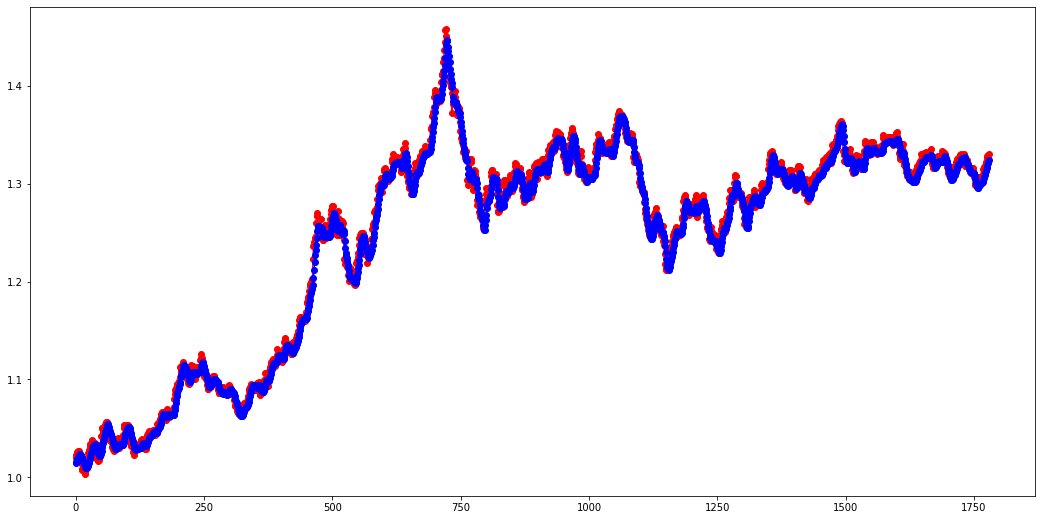

In [12]:
plt.figure(figsize=(18, 9))
plt.plot(test_data[30:], '-ro')
plt.plot(y_hat_inversed, '-bo')

In [13]:
print(train_data[-30:])

[[0.18623964]
 [0.18813444]
 [0.19097853]
 [0.1960266 ]
 [0.20255216]
 [0.2092476 ]
 [0.21345991]
 [0.21697685]
 [0.21870809]
 [0.2197601 ]
 [0.22013753]
 [0.22064592]
 [0.22085041]
 [0.22082357]
 [0.2224443 ]
 [0.22603285]
 [0.22928363]
 [0.23113384]
 [0.23210313]
 [0.23424077]
 [0.23818911]
 [0.2430079 ]
 [0.24852575]
 [0.25507343]
 [0.26191531]
 [0.26952808]
 [0.27764486]
 [0.28410644]
 [0.29044907]
 [0.29771795]]


In [14]:
pred_list = []

batch = train_data[-30:].reshape((1, 30, 1))

for i in range(30):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
print(batch.flatten())

[0.28038934 0.28186506 0.28342301 0.2847257  0.28578421 0.28662118
 0.28725547 0.28770083 0.28797197 0.28808135 0.28804171 0.28786516
 0.28756374 0.28714815 0.28662819 0.28601539 0.28532091 0.28455174
 0.28371301 0.28280964 0.28184867 0.28083724 0.27978086 0.27868423
 0.27755201 0.27638784 0.27519563 0.27397954 0.27273998 0.27147982]


In [15]:
#plt.plot(train_data[30:])
plt.plot(batch.flatten(), color='-r')

ValueError: Invalid RGBA argument: '-r'

<Figure size 432x288 with 1 Axes>

In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), 
                          index=df[-30:].index, columns=['Prediction'])
df_midpt = pd.DataFrame(mid_prices, columns=['Mid-point'])
df_test = pd.concat([df,df_midpt, df_predict], axis=1)
df_test

,date,high,low,open,close,Mid-point,Prediction
0,04/01/1971,1.0109,1.0109,1.0109,1.0109,0.021317,NaN
1,05/01/1971,1.0102,1.0102,1.0102,1.0102,0.040207,NaN
2,06/01/1971,1.0106,1.0106,1.0106,1.0106,0.057377,NaN
3,07/01/1971,1.0148,1.0148,1.0148,1.0148,0.074602,NaN
4,08/01/1971,1.0154,1.0154,1.0154,1.0154,0.090358,NaN
...,...,...,...,...,...,...,...
12805,03/02/2020,1.3304,1.3227,1.3233,1.3286,1.326550,1.129441
12806,04/02/2020,1.3302,1.3264,1.3286,1.3277,1.328300,1.128899
12807,05/02/2020,1.3303,1.3263,1.3276,1.3282,1.328300,1.128346
12808,06/02/2020,1.3309,1.3271,1.3282,1.3284,1.329000,1.127783


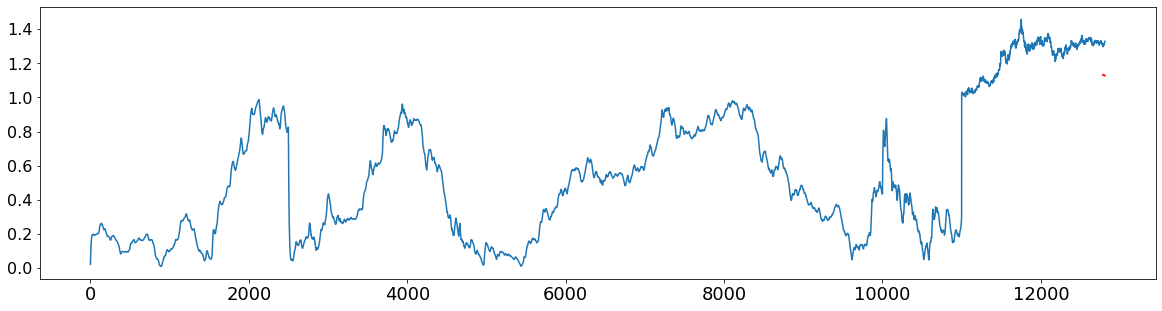

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Mid-point'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
#plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()


In [18]:
print(len(test_data))
print(len(y_hat_inversed))

1810
1780


In [19]:
y_recent = y_hat_inversed[-31:]
#print(y_recent)
y_recent2 = scaler.fit_transform(y_recent)
recent_generator = TimeseriesGenerator(y_recent2, y_recent2, length=30, batch_size=1)
for i in recent_generator:
    print(i)
# recent_hat = model.predict(recent_generator)
# recent_hat_inversed = scaler.inverse_transform(recent_hat)
# print(recent_hat_inversed)

(array([[[0.5351715 ],
        [0.485981  ],
        [0.42450714],
        [0.32423782],
        [0.2251358 ],
        [0.1482811 ],
        [0.0844574 ],
        [0.02906418],
        [0.00310135],
        [0.        ],
        [0.05121994],
        [0.081604  ],
        [0.10774994],
        [0.14351273],
        [0.1666565 ],
        [0.17486954],
        [0.19187546],
        [0.20825195],
        [0.22517776],
        [0.26744843],
        [0.34848404],
        [0.4004898 ],
        [0.47302628],
        [0.5390816 ],
        [0.59223557],
        [0.65716934],
        [0.71982956],
        [0.80506897],
        [0.8855133 ],
        [0.9470558 ]]], dtype=float32), array([[1.]], dtype=float32))


In [20]:
model.save('usd_cad.h5') 